# Importar librerias

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA, TruncatedSVD
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split
import matplotlib.patches as mpatches
import time
import datetime
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
import xgboost as xgb
import lightgbm as lgb
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score,average_precision_score
from pickle import dump
from pickle import load
from sklearn.metrics import roc_curve,precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, classification_report,average_precision_score
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import learning_curve
import shap
pd.set_option('display.max_columns', 500)

In [3]:
# import pip
# pip.main(['install','shap'])

# Funciones

In [5]:
def graph_roc_curve_multiple(est1_fpr, est1_tpr,est1_pred,
                             est2_fpr, est2_tpr,est2_pred,
                             est3_fpr, est3_tpr,est3_pred,
                             est4_fpr, est4_tpr,est4_pred,
                             est5_fpr, est5_tpr,est5_pred,
                             est6_fpr, est6_tpr,est6_pred,
                            y_test):
    plt.figure(figsize=(16,8))
    plt.title('ROC Curve \n Top 6 Classifiers', fontsize=18)
    plt.plot(est1_fpr, est1_tpr, label='Logistic Regression Score: {:.4f}'.format(roc_auc_score(y_test, est1_pred)))
    plt.plot(est2_fpr, est2_tpr, label='Decision tree with depth of two Score: {:.4f}'.format(roc_auc_score(y_test, est2_pred)))
    plt.plot(est3_fpr, est3_tpr, label='Decision tree- unlimited depth Score: {:.4f}'.format(roc_auc_score(y_test, est3_pred)))
    plt.plot(est4_fpr, est4_tpr, label='Random Forest Score: {:.4f}'.format(roc_auc_score(y_test, est4_pred)))
    plt.plot(est5_fpr, est5_tpr, label='XGBoost Score: {:.4f}'.format(roc_auc_score(y_test, est5_pred)))
    plt.plot(est6_fpr, est6_tpr, label='Lightgbm Score: {:.4f}'.format(roc_auc_score(y_test, est6_pred)))
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([-0.01, 1, 0, 1])
    plt.xlabel('False Positive Rate', fontsize=16)
    plt.ylabel('True Positive Rate', fontsize=16)
    plt.annotate('Minimum ROC Score of 50% \n (This is the minimum score to get)', xy=(0.5, 0.5), xytext=(0.6, 0.3),
                arrowprops=dict(facecolor='#6E726D', shrink=0.05),
                )
    plt.legend()

In [6]:
def plot_learning_curve(estimator1, estimator2, estimator3, estimator4,estimator5,estimator6, X, y, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
    f, ((ax1, ax2), (ax3, ax4),(ax5,ax6)) = plt.subplots(3,2, figsize=(20,14), sharey=True)
    if ylim is not None:
        plt.ylim(*ylim)
    # First Estimator
    train_sizes, train_scores, test_scores = learning_curve(
        estimator1, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    ax1.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="#ff9124")
    ax1.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="#2492ff")
    ax1.plot(train_sizes, train_scores_mean, 'o-', color="#ff9124",
             label="Training score")
    ax1.plot(train_sizes, test_scores_mean, 'o-', color="#2492ff",
             label="Cross-validation score")
    ax1.set_title("Logistic Regression Learning Curve", fontsize=14)
    ax1.set_xlabel('Training size (m)')
    ax1.set_ylabel('Score')
    ax1.grid(True)
    ax1.legend(loc="best")
    
    # Second Estimator 
    train_sizes, train_scores, test_scores = learning_curve(
        estimator2, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    ax2.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="#ff9124")
    ax2.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="#2492ff")
    ax2.plot(train_sizes, train_scores_mean, 'o-', color="#ff9124",
             label="Training score")
    ax2.plot(train_sizes, test_scores_mean, 'o-', color="#2492ff",
             label="Cross-validation score")
    ax2.set_title("Decision tree with depth of two Learning Curve", fontsize=14)
    ax2.set_xlabel('Training size (m)')
    ax2.set_ylabel('Score')
    ax2.grid(True)
    ax2.legend(loc="best")
    
    # Third Estimator
    train_sizes, train_scores, test_scores = learning_curve(
        estimator3, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    ax3.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="#ff9124")
    ax3.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="#2492ff")
    ax3.plot(train_sizes, train_scores_mean, 'o-', color="#ff9124",
             label="Training score")
    ax3.plot(train_sizes, test_scores_mean, 'o-', color="#2492ff",
             label="Cross-validation score")
    ax3.set_title("Decision tree- unlimited depth \n Learning Curve", fontsize=14)
    ax3.set_xlabel('Training size (m)')
    ax3.set_ylabel('Score')
    ax3.grid(True)
    ax3.legend(loc="best")
    
    # Fourth Estimator
    train_sizes, train_scores, test_scores = learning_curve(
        estimator4, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    ax4.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="#ff9124")
    ax4.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="#2492ff")
    ax4.plot(train_sizes, train_scores_mean, 'o-', color="#ff9124",
             label="Training score")
    ax4.plot(train_sizes, test_scores_mean, 'o-', color="#2492ff",
             label="Cross-validation score")
    ax4.set_title("Random Forest \n Learning Curve", fontsize=14)
    ax4.set_xlabel('Training size (m)')
    ax4.set_ylabel('Score')
    ax4.grid(True)
    ax4.legend(loc="best")
    
    # Fith Estimator
    train_sizes, train_scores, test_scores = learning_curve(
        estimator5, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    ax5.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="#ff9124")
    ax5.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="#2492ff")
    ax5.plot(train_sizes, train_scores_mean, 'o-', color="#ff9124",
             label="Training score")
    ax5.plot(train_sizes, test_scores_mean, 'o-', color="#2492ff",
             label="Cross-validation score")
    ax5.set_title("XGBoost \n Learning Curve", fontsize=14)
    ax5.set_xlabel('Training size (m)')
    ax5.set_ylabel('Score')
    ax5.grid(True)
    ax5.legend(loc="best")
    
    # Six Estimator
    train_sizes, train_scores, test_scores = learning_curve(
        estimator6, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    ax6.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="#ff9124")
    ax6.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="#2492ff")
    ax6.plot(train_sizes, train_scores_mean, 'o-', color="#ff9124",
             label="Training score")
    ax6.plot(train_sizes, test_scores_mean, 'o-', color="#2492ff",
             label="Cross-validation score")
    ax6.set_title("Lightgbm \n Learning Curve", fontsize=14)
    ax6.set_xlabel('Training size (m)')
    ax6.set_ylabel('Score')
    ax6.grid(True)
    ax6.legend(loc="best")
    return plt

In [7]:
def execution_times_model_collection(fitted_models_and_predictions_dictionary):

    execution_times=pd.DataFrame() 
    
    for classifier_name, model_and_predictions in fitted_models_and_predictions_dictionary.items():
    
        execution_times_model=pd.DataFrame() 
        execution_times_model['Training execution time']=[model_and_predictions['training_execution_time']]
        execution_times_model['Prediction execution time']=[model_and_predictions['prediction_execution_time']]
        execution_times_model.index=[classifier_name]
        
        execution_times=execution_times.append(execution_times_model)
        
    return execution_times

In [8]:
def performance_assessment_model_collection(fitted_models_and_predictions_dictionary, 
                                            transactions_df, 
                                            type_set='test',
                                            top_k_list=[100]):

    performances=pd.DataFrame() 
    
    for classifier_name, model_and_predictions in fitted_models_and_predictions_dictionary.items():
    
        predictions_df=transactions_df
            
        predictions_df['predictions']=model_and_predictions['predictions_'+type_set]
        
        performances_model=performance_assessment(predictions_df, output_feature='fraude', 
                                                   prediction_feature='predictions', top_k_list=top_k_list)
        performances_model.index=[classifier_name]
        
        performances=performances.append(performances_model)
        
    return performances

In [9]:
def ks_test(data=None,target=None, prob=None):
    data['target0'] = 1 - data[target]
    data['target0']=data['target0'].astype('float64')
    data['bucket'] = pd.qcut(data[prob], 10)
    grouped = data.groupby('bucket', as_index = False)
    kstable = pd.DataFrame()
    kstable['min_prob'] = grouped.min()[prob]
    kstable['max_prob'] = grouped.max()[prob]
    kstable['events']   = grouped.sum()[target]
    kstable['nonevents'] = grouped.sum()['target0']
    kstable = kstable.sort_values(by="min_prob", ascending=False).reset_index(drop = True)
    kstable['event_rate'] = (kstable.events / data[target].sum()).apply('{0:.2%}'.format)
    kstable['nonevent_rate'] = (kstable.nonevents / data['target0'].sum()).apply('{0:.2%}'.format)
    kstable['cum_eventrate']=(kstable.events / data[target].sum()).cumsum()
    kstable['cum_noneventrate']=(kstable.nonevents / data['target0'].sum()).cumsum()
    kstable['KS'] = np.round(kstable['cum_eventrate']-kstable['cum_noneventrate'], 3) * 100

    #Formating
    kstable['cum_eventrate']= kstable['cum_eventrate'].apply('{0:.2%}'.format)
    kstable['cum_noneventrate']= kstable['cum_noneventrate'].apply('{0:.2%}'.format)
    kstable.index = range(1,11)
    kstable.index.rename('Decile', inplace=True)
    pd.set_option('display.max_columns', 9)
    print(kstable)
    
    #Display KS
    from colorama import Fore
    print(Fore.RED + "KS is " + str(max(kstable['KS']))+"%"+ " at decile " + str((kstable.index[kstable['KS']==max(kstable['KS'])][0])))
    return(kstable)

In [10]:
def card_precision_top_k_day(df_day,top_k):
    
    # This takes the max of the predictions AND the max of label TX_FRAUD for each CUSTOMER_ID, 
    # and sorts by decreasing order of fraudulent prediction
    df_day = df_day.groupby('ID_USER').max().sort_values(by="predictions", ascending=False).reset_index(drop=False)
            
    # Get the top k most suspicious cards
    df_day_top_k=df_day.head(top_k)
    list_detected_frauded_cards=list(df_day_top_k[df_day_top_k.fraude==1].ID_USER)
    
    # Compute precision top k
    card_precision_top_k = len(list_detected_frauded_cards) / top_k
    
    return list_detected_frauded_cards, card_precision_top_k

In [11]:
def card_precision_top_k(predictions_df, top_k, remove_detected_frauded_cards=True):

    # Sort days by increasing order
    list_days=list(predictions_df['fecha'].unique())
    list_days.sort()
    
    # At first, the list of detected frauded cards is empty
    list_detected_frauded_cards = []
    
    card_precision_top_k_per_day_list = []
    nb_frauded_cards_per_day = []
    
    # For each day, compute precision top k
    for day in list_days:
        
        df_day = predictions_df[predictions_df['fecha']==day]
        df_day = df_day[['predictions', 'ID_USER', 'fraude']]
        
        # Let us remove detected frauded cards from the set of daily transactions
        df_day = df_day[df_day.ID_USER.isin(list_detected_frauded_cards)==False]
        
        nb_frauded_cards_per_day.append(len(df_day[df_day.fraude==1].ID_USER.unique()))
        
        detected_frauded_cards, card_precision_top_k = card_precision_top_k_day(df_day,top_k)
        
        card_precision_top_k_per_day_list.append(card_precision_top_k)
        
        # Let us update the list of detected frauded cards
        if remove_detected_frauded_cards:
            list_detected_frauded_cards.extend(detected_frauded_cards)
        
    # Compute the mean
    mean_card_precision_top_k = np.array(card_precision_top_k_per_day_list).mean()
    
    # Returns precision top k per day as a list, and resulting mean
    return nb_frauded_cards_per_day,card_precision_top_k_per_day_list,mean_card_precision_top_k

In [12]:
def performance_assessment(predictions_df, output_feature='fraude', 
                           prediction_feature='predictions', top_k_list=[100],
                           rounded=True):
    
    AUC_ROC = roc_auc_score(predictions_df[output_feature], predictions_df[prediction_feature])
    AP = average_precision_score(predictions_df[output_feature], predictions_df[prediction_feature])
    
    performances = pd.DataFrame([[AUC_ROC, AP]], 
                           columns=['AUC ROC','Average precision'])
    
    for top_k in top_k_list:
    
        _, _, mean_card_precision_top_k = card_precision_top_k(predictions_df, top_k)
        performances['Card Precision@'+str(top_k)]=mean_card_precision_top_k
        
    if rounded:
        performances = performances.round(3)
    
    return performances

In [13]:
def is_night(t_hour):
    
    # Binary value: 1 if hour more than 18, and 0 otherwise
    is_night = t_hour>=18
    
    return int(is_night)

In [14]:
def encode(data,columns):
    '''function to encode non-null data and replace it in the original data'''
    encoder_dict={}
    for col in columns:
        encoder_dict[col]=OrdinalEncoder()
        #retains only non-null values
        nonulls = np.array(data[col].dropna())
        #reshapes the data for encoding
        impute_reshape = nonulls.reshape(-1,1)
        #encode date
        impute_ordinal = encoder_dict[col].fit_transform(impute_reshape)
        #Assign back encoded values to non-null values
        data[col].loc[data[col].notnull()] = np.squeeze(impute_ordinal)
    return data,encoder_dict

In [15]:
def get_customer_spending_behaviour_features(customer_transactions, windows_size_in_days=[1,7,28]):
    
    # Let us first order transactions chronologically
    customer_transactions=customer_transactions.sort_values('fecha')
    
    # The transaction date and time is set as the index, which will allow the use of the rolling function 
    customer_transactions.index=customer_transactions.fecha
    
    # For each window size
    for window_size in windows_size_in_days:
        
        # Compute the sum of the transaction amounts and the number of transactions for the given window size
        SUM_AMOUNT_TX_WINDOW=customer_transactions['monto'].rolling(str(window_size)+'d').sum()
        NB_TX_WINDOW=customer_transactions['monto'].rolling(str(window_size)+'d').count()
    
        # Compute the average transaction amount for the given window size
        # NB_TX_WINDOW is always >0 since current transaction is always included
        AVG_AMOUNT_TX_WINDOW=SUM_AMOUNT_TX_WINDOW/NB_TX_WINDOW
    
        # Save feature values
        customer_transactions['CUSTOMER_ID_NB_TX_'+str(window_size)+'DAY_WINDOW']=list(NB_TX_WINDOW)
        customer_transactions['CUSTOMER_ID_AVG_AMOUNT_'+str(window_size)+'DAY_WINDOW']=list(AVG_AMOUNT_TX_WINDOW)
    
    # Reindex according to transaction IDs
    customer_transactions.index=customer_transactions.TID
        
    # And return the dataframe with the new features
    return customer_transactions

In [16]:
def get_count_risk_rolling_window(terminal_transactions, delay_period=7, windows_size_in_days=[1,7,28], feature="dispositivo"):
    
    terminal_transactions=terminal_transactions.sort_values('fecha')
    
    terminal_transactions.index=terminal_transactions.fecha
    
    NB_FRAUD_DELAY=terminal_transactions['fraude'].rolling(str(delay_period)+'d').sum()
    NB_TX_DELAY=terminal_transactions['fraude'].rolling(str(delay_period)+'d').count()
    
    for window_size in windows_size_in_days:
    
        NB_FRAUD_DELAY_WINDOW=terminal_transactions['fraude'].rolling(str(delay_period+window_size)+'d').sum()
        NB_TX_DELAY_WINDOW=terminal_transactions['fraude'].rolling(str(delay_period+window_size)+'d').count()
    
        NB_FRAUD_WINDOW=NB_FRAUD_DELAY_WINDOW-NB_FRAUD_DELAY
        NB_TX_WINDOW=NB_TX_DELAY_WINDOW-NB_TX_DELAY
    
        RISK_WINDOW=NB_FRAUD_WINDOW/NB_TX_WINDOW
        
        terminal_transactions[feature+'_NB_TX_'+str(window_size)+'DAY_WINDOW']=list(NB_TX_WINDOW)
        terminal_transactions[feature+'_RISK_'+str(window_size)+'DAY_WINDOW']=list(RISK_WINDOW)
        
    terminal_transactions.index=terminal_transactions.TID
    
    # Replace NA values with 0 (all undefined risk scores where NB_TX_WINDOW is 0) 
    terminal_transactions.fillna(0,inplace=True)
    
    return terminal_transactions

In [17]:
def get_tx_stats(transactions_df, start_date_df="2020-01-02"):
    
    #Number of transactions per day
    nb_tx_per_day=transactions_df.groupby(['fecha'])['ID_USER'].count()
    #Number of fraudulent transactions per day
    nb_fraudulent_transactions_per_day=transactions_df.groupby(['fecha'])['fraude'].sum()
    #Number of fraudulent cards per day
    nb_frauded_cards_per_day=transactions_df[transactions_df['fraude']==1].groupby(['fecha']).ID_USER.nunique()
    
    tx_stats=pd.DataFrame({"nb_tx_per_day":nb_tx_per_day,
                           "nb_fraudulent_transactions_per_day":nb_fraudulent_transactions_per_day,
                           "nb_frauded_cards_per_day":nb_frauded_cards_per_day})

    tx_stats=tx_stats.reset_index()
    
    start_date = datetime.datetime.strptime(start_date_df, "%Y-%m-%d")
    tx_date=(tx_stats['fecha']-start_date).dt.days
    
    tx_stats['tx_date']=tx_date
    
    return tx_stats

In [18]:
def get_template_tx_stats(ax ,fs,
                          start_date_training,
                          title='',
                          delta_train=7,
                          delta_delay=7,
                          delta_test=7,
                          ylim=300):
    
    ax.set_title(title, fontsize=fs*1.5)
    ax.set_ylim([0, ylim])
    
    ax.set_xlabel('Date', fontsize=fs)
    ax.set_ylabel('Number', fontsize=fs)
    
    plt.yticks(fontsize=fs*0.7) 
    plt.xticks(fontsize=fs*0.7)    

    ax.axvline(start_date_training+datetime.timedelta(days=delta_train), 0,ylim, color="black")
    ax.axvline(start_date_test, 0, ylim, color="black")
    
    ax.text(start_date_training+datetime.timedelta(days=2), ylim-20,'Training period', fontsize=fs)
    ax.text(start_date_training+datetime.timedelta(days=delta_train+2), ylim-20,'Delay period', fontsize=fs)
    ax.text(start_date_training+datetime.timedelta(days=delta_train+delta_delay+2), ylim-20,'Test period', fontsize=fs)

In [19]:
def get_train_test_set(transactions_df,
                       start_date_training,
                       delta_train=15,delta_delay=7,delta_test=7):
    
    # Get the training set data
    train_df = transactions_df[(transactions_df.fecha>=start_date_training) &
                               (transactions_df.fecha<start_date_training+datetime.timedelta(days=delta_train))]
    
    # Get the test set data
    test_df = []
    
    # Note: Cards known to be frauded after the delay period are removed from the test set
    # That is, for each test day, all frauds known at (test_day-delay_period) are removed
    
    # First, get known frauded customers from the training set
    known_frauded_customers = set(train_df[train_df.fraude==1].ID_USER)
    
    # Get the relative starting day of training set (easier than fecha to collect test data)
    start_tx_time_days_training = train_df.fecha.min()
    
    # Then, for each day of the test set
    for day in range(delta_test):
    
        # Get test data for that day
        test_df_day = transactions_df[transactions_df.fecha==start_tx_time_days_training+datetime.timedelta(days=delta_train+delta_delay+day)]
        
        # Frauded cards from that test day, minus the delay period, are added to the pool of known frauded customers
        test_df_day_delay_period = transactions_df[transactions_df.fecha==start_tx_time_days_training+datetime.timedelta(days=delta_train+day-1)]
        
        new_frauded_customers = set(test_df_day_delay_period[test_df_day_delay_period.fraude==1].ID_USER)
        known_frauded_customers = known_frauded_customers.union(new_frauded_customers)
        
        test_df_day = test_df_day[~test_df_day.ID_USER.isin(known_frauded_customers)]
        
        test_df.append(test_df_day)
        
    test_df = pd.concat(test_df)
    
    # Sort data sets by ascending order of transaction ID
    train_df=train_df.sort_values('TID')
    test_df=test_df.sort_values('TID')
    
    return (train_df, test_df)

In [20]:
def mean_encode(train_data, test_data, columns, target_col, reg_method=None,
                alpha=0, add_random=False, rmean=0, rstd=0.1, folds=1):
    '''Returns a DataFrame with encoded columns'''
    from sklearn.model_selection import StratifiedKFold
    encoded_cols = []
    target_mean_global = train_data[target_col].mean()
    for col in columns:
        # Getting means for test data
        nrows_cat = train_data.groupby(col)[target_col].count()
        target_means_cats = train_data.groupby(col)[target_col].mean()
        target_means_cats_adj = (target_means_cats*nrows_cat + 
                                 target_mean_global*alpha)/(nrows_cat+alpha)
        # Mapping means to test data
        encoded_col_test = test_data[col].map(target_means_cats_adj)
        # Getting a train encodings
        if reg_method == 'expanding_mean':
            train_data_shuffled = train_data.sample(frac=1, random_state=1)
            cumsum = train_data_shuffled.groupby(col)[target_col].cumsum() - train_data_shuffled[target_col]
            cumcnt = train_data_shuffled.groupby(col).cumcount()
            encoded_col_train = cumsum/(cumcnt)
            encoded_col_train.fillna(target_mean_global, inplace=True)
            if add_random:
                encoded_col_train = encoded_col_train + normal(loc=rmean, scale=rstd, 
                                                               size=(encoded_col_train.shape[0]))
        elif (reg_method == 'k_fold') and (folds > 1):
            kfold = StratifiedKFold(folds, shuffle=True, random_state=1)
            parts = []
            for tr_in, val_ind in kfold.split(train_data.drop([target_col],axis=1), train_data[target_col]):
                # divide data
                df_for_estimation, df_estimated = train_data.iloc[tr_in], train_data.iloc[val_ind]
                # getting means on data for estimation (all folds except estimated)
                nrows_cat = df_for_estimation.groupby(col)[target_col].count()
                target_means_cats = df_for_estimation.groupby(col)[target_col].mean()
                target_means_cats_adj = (target_means_cats*nrows_cat + 
                                         target_mean_global*alpha)/(nrows_cat+alpha)
                # Mapping means to estimated fold
                encoded_col_train_part = df_estimated[col].map(target_means_cats_adj)
                if add_random:
                    encoded_col_train_part = encoded_col_train_part + normal(loc=rmean, scale=rstd, 
                                                                             size=(encoded_col_train_part.shape[0]))
                # Saving estimated encodings for a fold
                parts.append(encoded_col_train_part)
            encoded_col_train = pd.concat(parts, axis=0)
            encoded_col_train.fillna(target_mean_global, inplace=True)
        else:
            encoded_col_train = train_data[col].map(target_means_cats_adj)
            if add_random:
                encoded_col_train = encoded_col_train + normal(loc=rmean, scale=rstd, 
                                                               size=(encoded_col_train.shape[0]))

        # Saving the column with means
        encoded_col = pd.concat([encoded_col_train, encoded_col_test], axis=0)
        encoded_col[encoded_col.isnull()] = target_mean_global
        encoded_cols.append(pd.DataFrame({'mean_'+target_col+'_'+col:encoded_col}))
    all_encoded = pd.concat(encoded_cols, axis=1)
    return (all_encoded.loc[train_data.index,:], 
            all_encoded.loc[test_data.index,:])

In [21]:
def resamp(train_data,target,escaler=5):
    from sklearn.utils import resample
    df_majority = train_data[train_data[target]==0]
    df_minority = train_data[train_data[target]==1]

    # Upsample minority class
    df_minority_upsampled = resample(df_minority, 
                                     replace=True,     # sample with replacement
                                     n_samples=escaler*len(df_minority),    # to match majority class
                                     random_state=123)
    df_majority_downsampled = resample(df_majority, 
                                     replace=False,    # sample without replacement
                                     n_samples=int(len(df_majority)),     # to match minority class
                                     random_state=123)
    df_temp= pd.concat([df_majority_downsampled, df_minority_upsampled])
    return df_temp

In [22]:
def resamp_smote(train_data,target,over_sampling=0.1,under_sampling=0.5):
    over = SMOTE(sampling_strategy=over_sampling)
    under = RandomUnderSampler(sampling_strategy=under_sampling)
    steps = [('o', over), ('u', under)]
    pipeline = Pipeline(steps=steps)
    # transform the dataset
    X_train, y_train = pipeline.fit_resample(train_data.drop([target],axis=1), train_data[target])
    df_temp=X_train.copy()
    df_temp[target]=y_train
    return df_temp

In [23]:
def fit_model_and_get_predictions(classifier, train_df, test_df, 
                                  input_features, output_feature="fraude",res_smote=False,
                                 over=0.1,under=0.5,escal=5):
 
    # We first train the classifier using the `fit` method, and pass as arguments the input and output features
    start_time=time.time()
    if res_smote:
        classifier.fit(resamp_smote(train_df[input_features+[output_feature]],output_feature,over,under)[input_features], resamp_smote(train_df[input_features+[output_feature]],output_feature,over,under)[output_feature])
    else:
        classifier.fit(resamp(train_df[input_features+[output_feature]],output_feature,escaler=escal)[input_features], resamp(train_df[input_features+[output_feature]],output_feature,escaler=escal)[output_feature])
    
    training_execution_time=time.time()-start_time

    # We then get the predictions on the training and test data using the `predict_proba` method
    # The predictions are returned as a numpy array, that provides the probability of fraud for each transaction 
    start_time=time.time()
    predictions_test=classifier.predict_proba(test_df[input_features])[:,1]
    prediction_execution_time=time.time()-start_time
    
    predictions_train=classifier.predict_proba(train_df[input_features])[:,1]

    # The result is returned as a dictionary containing the fitted models, 
    # and the predictions on the training and test sets
    model_and_predictions_dictionary = {'classifier': classifier,
                                        'predictions_test': predictions_test,
                                        'predictions_train': predictions_train,
                                        'training_execution_time': training_execution_time,
                                        'prediction_execution_time': prediction_execution_time
                                       }
    
    return model_and_predictions_dictionary

# Importar dataset

In [24]:
df=pd.read_csv('ds_challenge_2021.csv')
df.reset_index(inplace=True)
df.rename(columns={'index':'TID'},inplace=True)

In [158]:
df.head()

,TID,ID_USER,genero,monto,fecha,hora,dispositivo,establecimiento,ciudad,tipo_tc,linea_tc,interes_tc,status_txn,is_prime,dcto,cashback,fraude
0,0,0,F,608.345634,2020-01-21,20,"{'model': 2020, 'device_score': 3, 'os': 'ANDR...",Super,Merida,Física,71000,51,Aceptada,False,60.834563,5.475111,False
1,1,0,F,88.719243,2020-01-15,7,"{'model': 2020, 'device_score': 1, 'os': 'ANDR...",NaN,Merida,Virtual,71000,51,Aceptada,False,0.000000,1.774385,False
2,2,1,F,790.037653,2020-01-17,11,"{'model': 2020, 'device_score': 1, 'os': '.'}",NaN,Guadalajara,Virtual,94000,56,En proceso,False,0.000000,15.800753,False
3,3,1,F,767.005387,2020-01-05,11,"{'model': 2020, 'device_score': 3, 'os': 'WEB'}",MPago,Guadalajara,Física,94000,56,Aceptada,False,0.000000,7.670054,False
4,4,1,F,254.171053,2020-01-30,10,"{'model': 2020, 'device_score': 3, 'os': '%%'}",NaN,Guadalajara,Física,94000,56,Aceptada,False,0.000000,2.541711,False


# EDA

In [9]:
df.shape

(26975, 16)

In [4]:
df.fraude.value_counts(normalize=True)

False    0.969972
True     0.030028
Name: fraude, dtype: float64

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26975 entries, 0 to 26974
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID_USER          26975 non-null  int64  
 1   genero           26975 non-null  object 
 2   monto            26975 non-null  float64
 3   fecha            26975 non-null  object 
 4   hora             26975 non-null  int64  
 5   dispositivo      26975 non-null  object 
 6   establecimiento  16856 non-null  object 
 7   ciudad           15297 non-null  object 
 8   tipo_tc          26975 non-null  object 
 9   linea_tc         26975 non-null  int64  
 10  interes_tc       26975 non-null  int64  
 11  status_txn       26975 non-null  object 
 12  is_prime         26975 non-null  bool   
 13  dcto             26975 non-null  float64
 14  cashback         26975 non-null  float64
 15  fraude           26975 non-null  bool   
dtypes: bool(2), float64(3), int64(4), object(7)
memory usage: 

In [7]:
df.describe()

,ID_USER,monto,hora,linea_tc,interes_tc,dcto,cashback
count,26975.000000,26975.000000,26975.000000,26975.000000,26975.000000,26975.000000,26975.000000
mean,2003.765412,499.069493,11.987618,62476.811863,48.224875,17.466134,6.261186
std,1144.630736,289.309518,6.642565,21886.892902,9.587256,34.334566,4.458440
min,0.000000,0.017303,1.000000,25000.000000,32.000000,0.000000,0.000138
25%,1041.000000,246.521227,6.000000,44000.000000,40.000000,0.000000,2.791740
50%,2006.000000,500.501022,12.000000,62000.000000,48.000000,0.000000,5.636711
75%,2973.500000,749.598192,18.000000,82000.000000,57.000000,18.770710,8.531604
max,3999.000000,999.917764,23.000000,99000.000000,64.000000,199.356251,19.991582


## Nulos

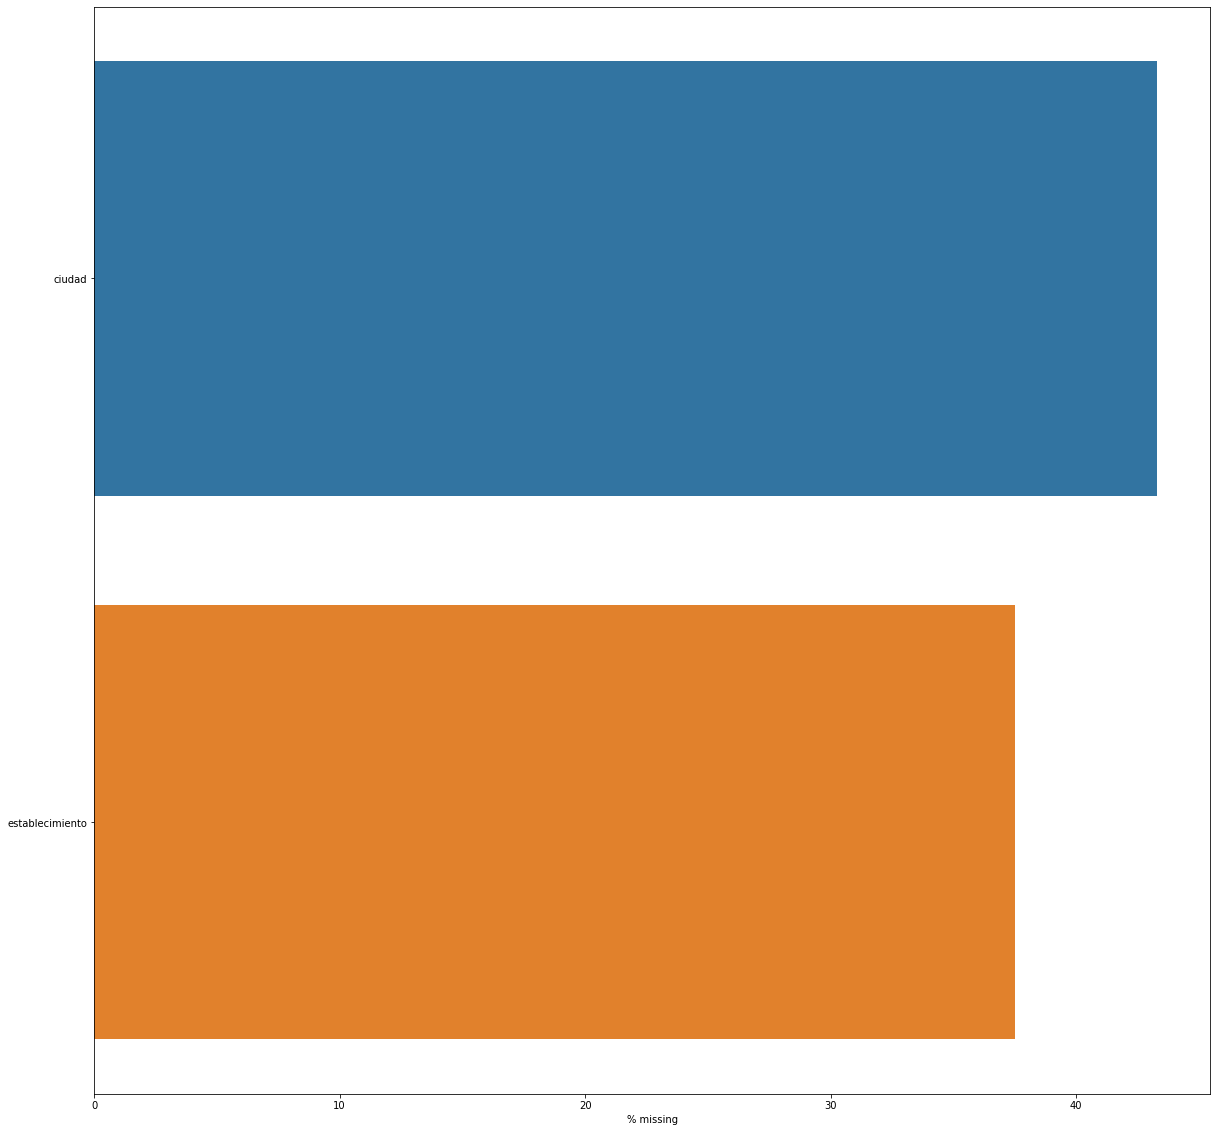

In [8]:
try:
    plt.figure(figsize=(20,20))
    df_na = (df.isnull().sum() / len(df)) * 100
    df_na = df_na.drop(df_na[df_na == 0].index).sort_values(ascending=False)
    sns.barplot(y=df_na.index, x=df_na)
    plt.xlabel('% missing')
except:
    print('No Hay nulos')

En primera instancia, validamos si hay nulos: en este caso se observa que las variables ciudad y establecimiento presentan apróximadamente 40% valores nulos que es una gran cantidad que no se puede eliminar y se analizará para dar el tratamiento respectivo

## Variable binaria objetivo: fraude

c:\users\rosorio\appdata\local\programs\python\python37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Class Distributions \n (0: No Fraud || 1: Fraud)')

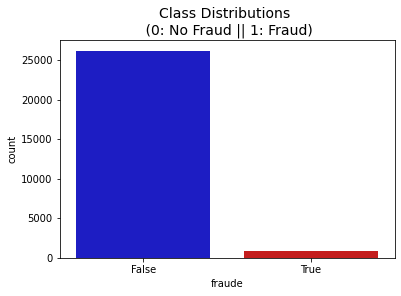

In [29]:
colors = ["#0101DF", "#DF0101"]

sns.countplot('fraude', data=df, palette=colors)
plt.title('Class Distributions \n (0: No Fraud || 1: Fraud)', fontsize=14)

Con esta gráfica observamos que tenemos un problema de imbalanceo con nuestra variable objetivo: fraude. El 3% del total de transacciones corresponden a una fraudulenta.

## Variables numéricas

c:\users\rosorio\appdata\local\programs\python\python37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


(0.0173025133763937, 999.9177636135802)

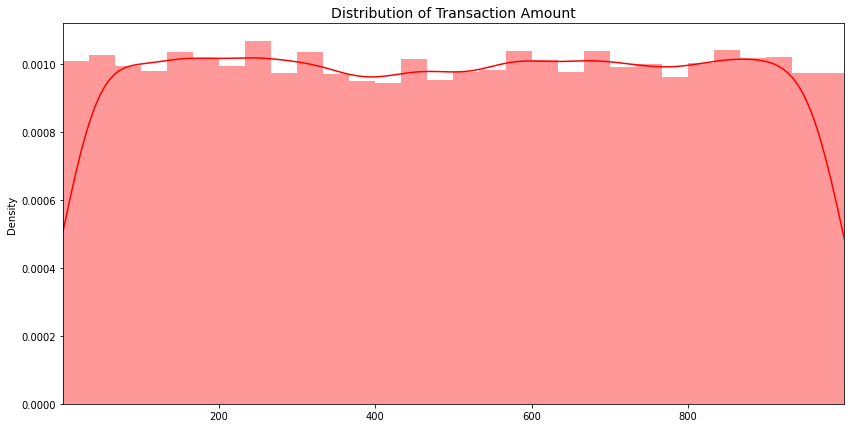

In [36]:
fig, ax = plt.subplots(figsize=(14, 7), sharex=True)
amount_val = df['monto'].values

sns.distplot(amount_val, color='r')
ax.set_title('Distribution of Transaction Amount', fontsize=14)
ax.set_xlim([min(amount_val), max(amount_val)])

La variable monto se observa que tiene una distribución uniforme

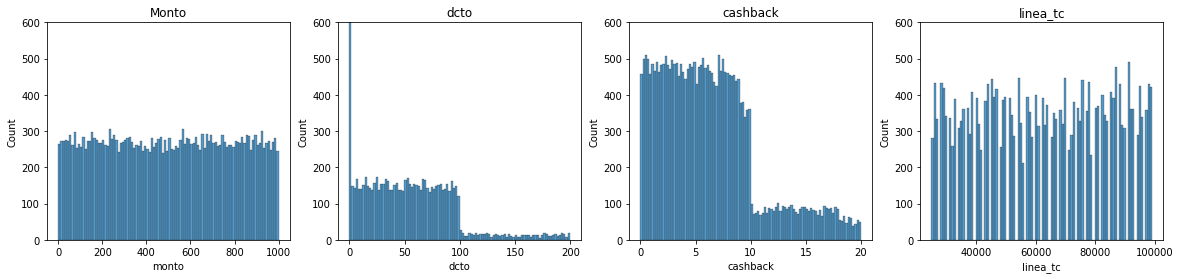

In [68]:
f, axes = plt.subplots(ncols=4, figsize=(20,4))

# Positive correlations (The higher the feature the probability increases that it will be a fraud transaction)
sns.histplot(df.monto,bins=100,ax=axes[0])
axes[0].set_title('Monto')
axes[0].set_ylim(0,600)

sns.histplot(df.dcto,bins=100,ax=axes[1])
axes[1].set_title('dcto')
axes[1].set_ylim(0,600)

sns.histplot(df.cashback,bins=100,ax=axes[2])
axes[2].set_title('cashback')
axes[2].set_ylim(0,600)

sns.histplot(df.linea_tc,bins=100, ax=axes[3])
axes[3].set_title('linea_tc')
axes[3].set_ylim(0,600)

plt.show()

La variable "dcto" tiene una gran cantidad de 0 lo cual significa que varias transacciones no tienen descuento y posterior a ello tiene un comportamiento similar a la variable cashback. Por otro lado, la variable "linea_tc" tmb presenta una distrubicón uniforme discreta.

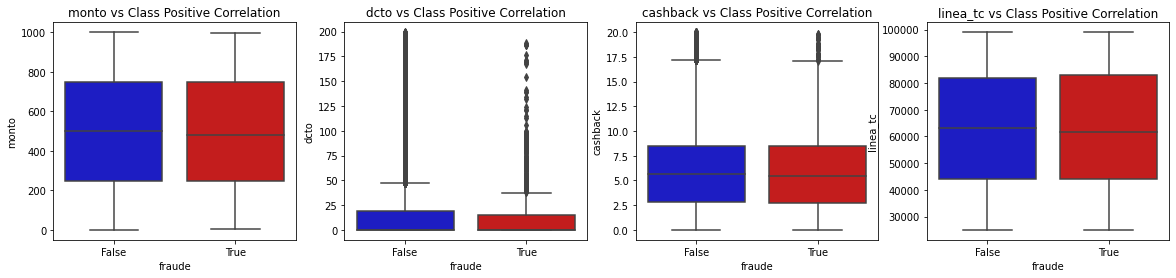

In [37]:
f, axes = plt.subplots(ncols=4, figsize=(20,4))

# Positive correlations (The higher the feature the probability increases that it will be a fraud transaction)
sns.boxplot(x="fraude", y="monto", data=df, palette=colors, ax=axes[0])
axes[0].set_title('monto vs Class Positive Correlation')

sns.boxplot(x="fraude", y="dcto", data=df, palette=colors, ax=axes[1])
axes[1].set_title('dcto vs Class Positive Correlation')


sns.boxplot(x="fraude", y="cashback", data=df, palette=colors, ax=axes[2])
axes[2].set_title('cashback vs Class Positive Correlation')


sns.boxplot(x="fraude", y="linea_tc", data=df, palette=colors, ax=axes[3])
axes[3].set_title('linea_tc vs Class Positive Correlation')

plt.show()

Usando boxplots, observamos que las variables numéricas presentan distribuciones similares tanto en las transacciones fraudulentas como en las genuinas.

Text(0.5, 1.0, 'Imbalanced Correlation Matrix')

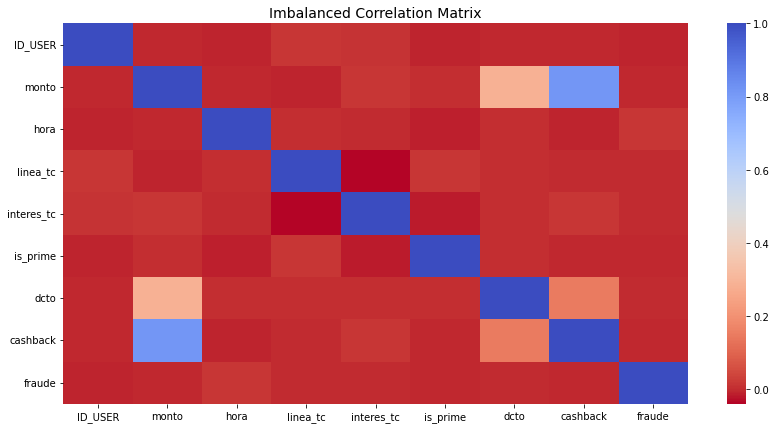

In [39]:
f, ax = plt.subplots(figsize=(14, 7), sharex=True)

# Entire DataFrame
corr = df.corr()
sns.heatmap(corr, cmap='coolwarm_r', annot_kws={'size':20}, ax=ax)
ax.set_title("Imbalanced Correlation Matrix", fontsize=14)

Viendo correlación entre variables se observa que la variable "cashback" y la variable "monto" tienen una fuerte correlación. Mientras que las variables "dcto" y "monto" presentan una correlación con un coeficiente de pearson entre 0.2 y 0.4, así como las variables "dcto" y "cashback" que tienen un coeficiente de pearson de apróximadamente 0.2.

## Variables categóricas

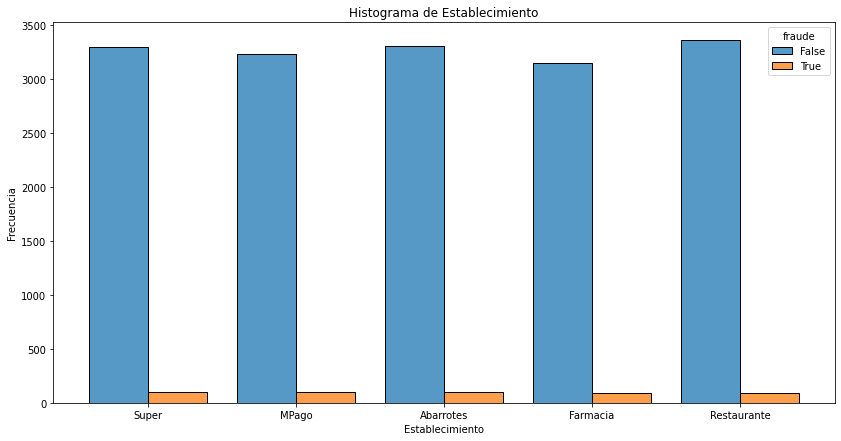

In [40]:
fig, ax = plt.subplots(figsize=(14, 7), sharex=True)
sns.histplot(ax=ax,data=df,x='establecimiento', hue='fraude', multiple="dodge", shrink=.8) #creamos el gráfico en Seaborn
ax.tick_params(axis='x')
#configuramos en Matplotlib
#ax.set_ylim(0,700000)
ax.set(xlabel='Establecimiento', ylabel='Frecuencia')
ax.set_title('Histograma de Establecimiento')

plt.show()

La variable establecimiento es categórica y presenta 5 categorías no nulas. Estas , presentan una proporción similar de transacciones fraudulentas.

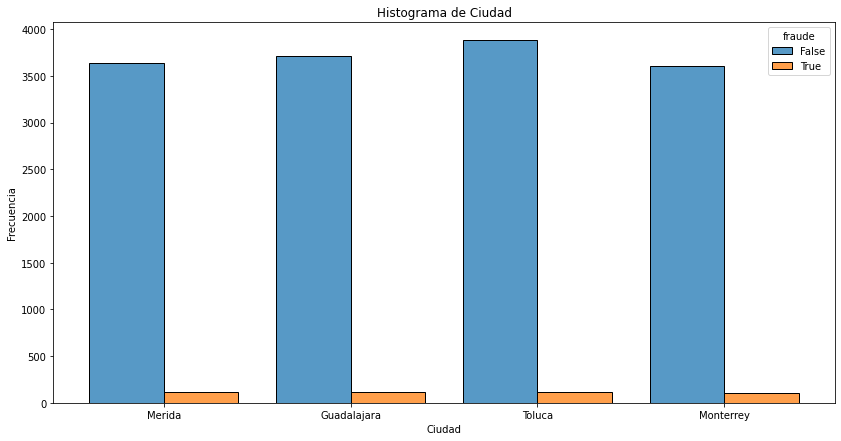

In [41]:
fig, ax = plt.subplots(figsize=(14, 7), sharex=True)
sns.histplot(ax=ax,data=df,x='ciudad', hue='fraude', multiple="dodge", shrink=.8) #creamos el gráfico en Seaborn
ax.tick_params(axis='x')
#configuramos en Matplotlib
#ax.set_ylim(0,700000)
ax.set(xlabel='Ciudad', ylabel='Frecuencia')
ax.set_title('Histograma de Ciudad')

plt.show()

La variable ciudad es categórica y presenta 4 categorías no nulas. Estas , presentan una proporción similar de transacciones fraudulentas.

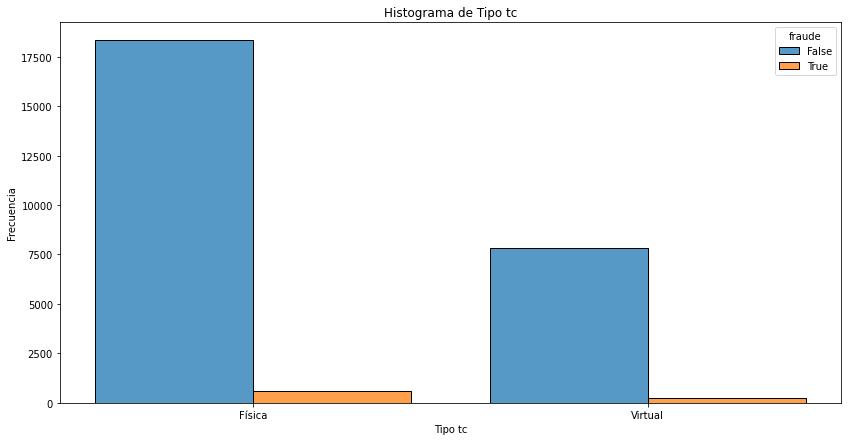

In [42]:
fig, ax = plt.subplots(figsize=(14, 7), sharex=True)
sns.histplot(ax=ax,data=df,x='tipo_tc', hue='fraude', multiple="dodge", shrink=.8) #creamos el gráfico en Seaborn
ax.tick_params(axis='x')
#configuramos en Matplotlib
#ax.set_ylim(0,700000)
ax.set(xlabel='Tipo tc', ylabel='Frecuencia')
ax.set_title('Histograma de Tipo tc')

plt.show()

Al mismo tiempo, la variable categórica de tipo_tc presenta dos categorías y cada uno tiene una proporción de transacciones fraudulentes de apróximadamente 3%

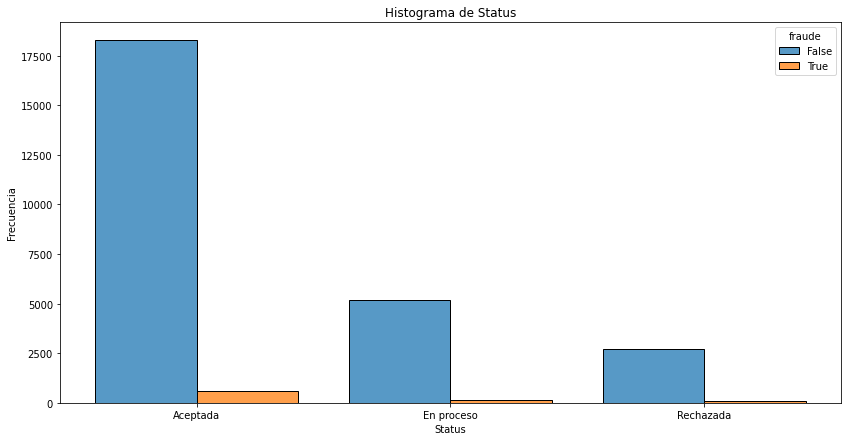

In [43]:
fig, ax = plt.subplots(figsize=(14, 7), sharex=True)
sns.histplot(ax=ax,data=df,x='status_txn', hue='fraude', multiple="dodge", shrink=.8) #creamos el gráfico en Seaborn
ax.tick_params(axis='x')
#configuramos en Matplotlib
#ax.set_ylim(0,700000)
ax.set(xlabel='Status', ylabel='Frecuencia')
ax.set_title('Histograma de Status')

plt.show()

La variable Status presenta 3 categorías y las 3 presentan una proporción similar de transacciones fraudulentas de 3%

<string>:6: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<string>:6: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<string>:6: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.


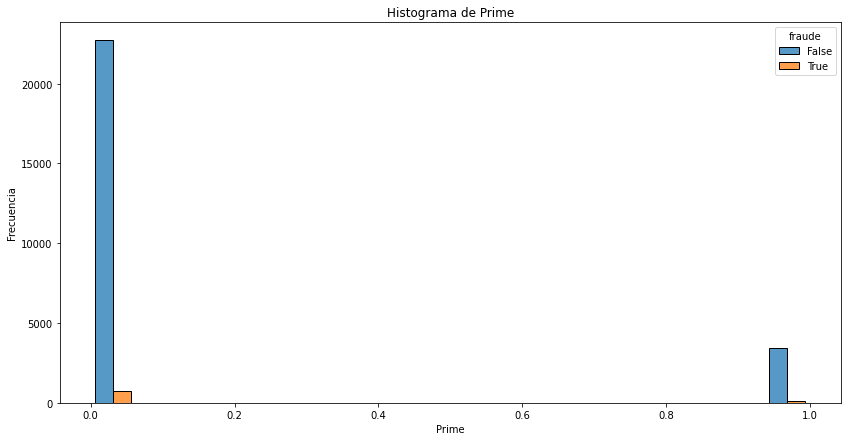

In [44]:
fig, ax = plt.subplots(figsize=(14, 7), sharex=True)
sns.histplot(ax=ax,data=df,x='is_prime', hue='fraude', multiple="dodge", shrink=.8) #creamos el gráfico en Seaborn
ax.tick_params(axis='x')
#configuramos en Matplotlib
#ax.set_ylim(0,700000)
ax.set(xlabel='Prime', ylabel='Frecuencia')
ax.set_title('Histograma de Prime')

plt.show()

La variable Prime es booleana y sus categorías presentan una proporción similar de transacciones fraudulentas de 3%

## Variables de fecha y tiempo

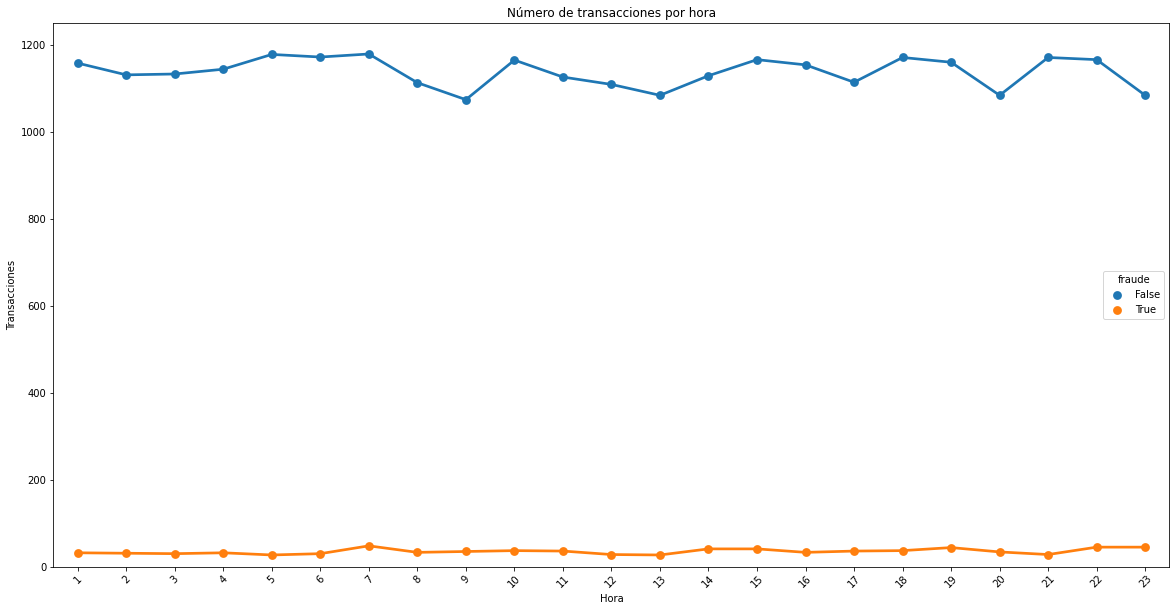

In [63]:
fig, ax = plt.subplots(figsize=(20, 10), sharex=True)
data = df.groupby(['hora','fraude'],as_index=False)['TID'].nunique()
sns.pointplot(data=data, x='hora', y='TID',hue='fraude')
ax.tick_params(axis='x')
ax.set(xlabel='Hora', ylabel='Transacciones')
ax.set_ylim(0,1250)#el maximo llega casi a 250k que se da en abril
ax.set_title('Número de transacciones por hora')
plt.xticks(rotation=45)
plt.show()

Con respecto al número de transacciones por hora, se podría decir que es casi constante para las fraudulentas y genuinas. No obstante para las fraudulentas hay un pequeño pico a las 7, mientras que en las genuinas hay bajadas a las 9, 13,17,20 y 23.

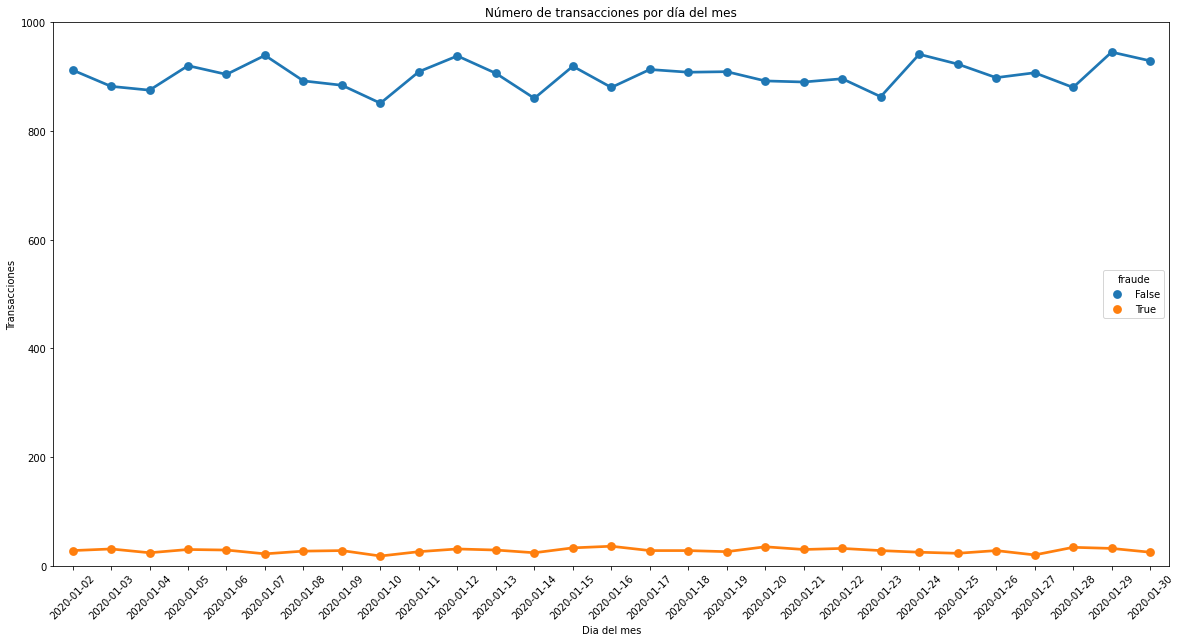

In [65]:
fig, ax = plt.subplots(figsize=(20, 10), sharex=True)
data = df.groupby(['fecha','fraude'],as_index=False)['TID'].nunique()
sns.pointplot(data=data, x='fecha', y='TID',hue='fraude')
ax.tick_params(axis='x')
ax.set(xlabel='Dia del mes', ylabel='Transacciones')
ax.set_ylim(0,1000)#el maximo llega casi a 250k que se da en abril
ax.set_title('Número de transacciones por día del mes')
plt.xticks(rotation=45)
plt.show()

El número de transacciones por día del mes es constante para el caso de las fraudulentas, mientras que para las genuinas es irregular pero de todas maneras son números cercanos.

# Feature Engineering

In [29]:
df.head()

,TID,ID_USER,genero,monto,fecha,hora,dispositivo,establecimiento,ciudad,tipo_tc,linea_tc,interes_tc,status_txn,is_prime,dcto,cashback,fraude
0,0,0,F,608.345634,2020-01-21,20,"{'model': 2020, 'device_score': 3, 'os': 'ANDR...",Super,Merida,Física,71000,51,Aceptada,False,60.834563,5.475111,False
1,1,0,F,88.719243,2020-01-15,7,"{'model': 2020, 'device_score': 1, 'os': 'ANDR...",NaN,Merida,Virtual,71000,51,Aceptada,False,0.000000,1.774385,False
2,2,1,F,790.037653,2020-01-17,11,"{'model': 2020, 'device_score': 1, 'os': '.'}",NaN,Guadalajara,Virtual,94000,56,En proceso,False,0.000000,15.800753,False
3,3,1,F,767.005387,2020-01-05,11,"{'model': 2020, 'device_score': 3, 'os': 'WEB'}",MPago,Guadalajara,Física,94000,56,Aceptada,False,0.000000,7.670054,False
4,4,1,F,254.171053,2020-01-30,10,"{'model': 2020, 'device_score': 3, 'os': '%%'}",NaN,Guadalajara,Física,94000,56,Aceptada,False,0.000000,2.541711,False


## Transformación de fechas

Aqui seguiremos los sgtes pasos:

* Convertir la columna fecha a variable de tipo datetime
* Obtener la diferencia de dias entre las transacciones del mismo usuario (variable "dif_fechas_tran")
* Determinar el día de la semana de la transacción (variable "fecha_weeday")
* Variable "flag_weekend": Determina si el día de la semana es fin de semana (viernes, sábado o domingo) o no
* Variable "flag_night": Determina si la hora de la transacción es de noche (después de las 6 pm)

In [25]:
df['fecha']=pd.to_datetime(df['fecha'])
df.sort_values(by=['ID_USER','fecha'],inplace=True)
df.drop(columns='TID',inplace=True)
df.reset_index(inplace=True)
df.rename(columns={'index':'TID'},inplace=True)
df['dif_fechas_tran']=df.sort_values(by=['ID_USER','fecha']).groupby(['ID_USER'],as_index=False)['fecha'].diff()
df['dif_fechas_tran']=df['dif_fechas_tran'].dt.days
df['dif_fechas_tran']=df['dif_fechas_tran'].fillna(0)
df['fecha_weeday']=df['fecha'].dt.weekday
df['flag_weekend']=np.where(df['fecha_weeday'].isin([4,5,6]),1,0)
df['flag_night']=df.hora.apply(is_night)

## Tratamiento de nulos

Se sigue los sgtes pasos:

* Se crean las variables "flag_nulo_estable" y "flag_nulo_ciudad" que indica si la transacción tiene un valor nulo en la variable "establecimiento" y "ciudad" respectivamente.
* Debido a que es una gran cantidad de valores que son nulos en las variables "establecimiento" y "ciudad", se crea una nueva categoría "Nulo"

In [26]:
df['flag_nulo_estable']=np.where(df['establecimiento'].isnull(),1,0)
df['flag_nulo_ciudad']=np.where(df['ciudad'].isnull(),1,0)
df['establecimiento']=df['establecimiento'].fillna('Nulo')
df['ciudad']=df['ciudad'].fillna('Nulo')

## Label Encoder

La variable "dispositivo" es categórica y se encodea usando label encoder

In [27]:
cat_encode=['dispositivo']
(df,encoder_dict_train)=encode(df,cat_encode)


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [33]:
df.head()

,TID,ID_USER,genero,monto,fecha,hora,dispositivo,establecimiento,ciudad,tipo_tc,linea_tc,interes_tc,status_txn,is_prime,dcto,cashback,fraude,dif_fechas_tran,fecha_weeday,flag_weekend,flag_night,flag_nulo_estable,flag_nulo_ciudad
0,1,0,F,88.719243,2020-01-15,7,2.0,Nulo,Merida,Virtual,71000,51,Aceptada,False,0.000000,1.774385,False,0.0,2,0,0,1,0
1,0,0,F,608.345634,2020-01-21,20,10.0,Super,Merida,Física,71000,51,Aceptada,False,60.834563,5.475111,False,6.0,1,0,1,0,0
2,3,1,F,767.005387,2020-01-05,11,11.0,MPago,Guadalajara,Física,94000,56,Aceptada,False,0.000000,7.670054,False,0.0,6,1,0,0,0
3,6,1,F,334.516017,2020-01-06,2,0.0,Abarrotes,Guadalajara,Física,94000,56,Aceptada,False,33.451602,3.010644,False,1.0,0,0,0,0,0
4,7,1,F,322.264405,2020-01-11,13,12.0,MPago,Guadalajara,Física,94000,56,Aceptada,False,0.000000,3.222644,False,5.0,5,1,0,0,0


## Transformación de ID_USER

Aqui se toma como inspiración el framework RFM (Recency, Frequency, Monetary Value) y se genera dos de las 3 variables sobre 3 ventanas de tiempo. La primera variable será el número de transacciones que ocurren durante una ventana de tiempo (Frequency). La segunda será el monto promedio gastado en esas transacciones (Monetary value). Las ventanas de tiempo serán 1, 7 y 28 lo que generará 6 nuevas variables

In [28]:
%%time
df_2=df.groupby('ID_USER').apply(lambda x: get_customer_spending_behaviour_features(x))
df_2.reset_index(drop=True,inplace=True)

Wall time: 24.5 s


In [29]:
df_2.head()

,TID,ID_USER,genero,monto,fecha,hora,dispositivo,establecimiento,ciudad,tipo_tc,linea_tc,interes_tc,status_txn,is_prime,dcto,cashback,fraude,dif_fechas_tran,fecha_weeday,flag_weekend,flag_night,flag_nulo_estable,flag_nulo_ciudad,CUSTOMER_ID_NB_TX_1DAY_WINDOW,CUSTOMER_ID_AVG_AMOUNT_1DAY_WINDOW,CUSTOMER_ID_NB_TX_7DAY_WINDOW,CUSTOMER_ID_AVG_AMOUNT_7DAY_WINDOW,CUSTOMER_ID_NB_TX_28DAY_WINDOW,CUSTOMER_ID_AVG_AMOUNT_28DAY_WINDOW
0,1,0,F,88.719243,2020-01-15,7,2.0,Nulo,Merida,Virtual,71000,51,Aceptada,False,0.000000,1.774385,False,0.0,2,0,0,1,0,1.0,88.719243,1.0,88.719243,1.0,88.719243
1,0,0,F,608.345634,2020-01-21,20,10.0,Super,Merida,Física,71000,51,Aceptada,False,60.834563,5.475111,False,6.0,1,0,1,0,0,1.0,608.345634,2.0,348.532438,2.0,348.532438
2,3,1,F,767.005387,2020-01-05,11,11.0,MPago,Guadalajara,Física,94000,56,Aceptada,False,0.000000,7.670054,False,0.0,6,1,0,0,0,1.0,767.005387,1.0,767.005387,1.0,767.005387
3,6,1,F,334.516017,2020-01-06,2,0.0,Abarrotes,Guadalajara,Física,94000,56,Aceptada,False,33.451602,3.010644,False,1.0,0,0,0,0,0,1.0,334.516017,2.0,550.760702,2.0,550.760702
4,7,1,F,322.264405,2020-01-11,13,12.0,MPago,Guadalajara,Física,94000,56,Aceptada,False,0.000000,3.222644,False,5.0,5,1,0,0,0,1.0,322.264405,3.0,474.595270,3.0,474.595270


## Transformación de la variable "dispositivos"

El objetivo principal será extraer un score de riesgo a partir de determinar la exposición de un dispositivo a transacciones fraudulentas. El score de riesgo será definido como el número promedio de transacciones fraudulentas que ocurren en un dispositivo sobre una ventana de tiempo. Así como en el paso anterior, se usarán 3 ventanas de tiempo: 1, 7 y 28.

Contrario a la transformación de User_ID, las ventanas de tiempo no precederá directamente una transacción dada. En vez de ello, ellas serán retrasadas por un tiempo de demora. El periodo de demora va por el hecho que, en la práctica, las transacciones fraudulentas son solo descubiertas después de una investigación de fraude o una queja de un cliente. Además, las etiquetas de fraude, que son necesitadas para obtener el score de riesgo, estarán disponibles después de este periodo de demora. Para un primer acercamiento, este periodo de demora será de una semana.

Por tal motivo creamos la funcion "get_count_risk_rolling_window". En una primera etapa, el número de transacciones y transacciones fraudulentas son calculadas para un periodo de tiempo. Posterior a ello, el número de transacciones y transacciones fraudulentas son calculadas para cada ventana de tiempo más el tiempo de demora. El número de transacciones y transacciones fraudulentas que ocurren para una ventana de tiempo dada, retrasadas por el periodo de demora, es entonces obtenido calculando la diferencia de las cantidades obtenidas por el periodo de demora y la ventana de tiempo más el periodo de demora.

El score de riesgo es finalmente obtenido por el calculo de la proporción de transacciones fraudulentas para cada ventana de tiempo (o 0 si ninguna transacción ocurre durante la ventana de tiempo)

Adicionalmente al score de riesgo, la función también regresa el número de transacciones para cada ventana de tiempo 

In [30]:
%%time
df_3=df_2.groupby('dispositivo').apply(lambda x: get_count_risk_rolling_window(x))
df_3=df_3.sort_values('fecha').reset_index(drop=True)

Wall time: 253 ms


In [37]:
df_3.tail()

,TID,ID_USER,genero,monto,fecha,hora,dispositivo,establecimiento,ciudad,tipo_tc,linea_tc,interes_tc,status_txn,is_prime,dcto,cashback,fraude,dif_fechas_tran,fecha_weeday,flag_weekend,flag_night,flag_nulo_estable,flag_nulo_ciudad,CUSTOMER_ID_NB_TX_1DAY_WINDOW,CUSTOMER_ID_AVG_AMOUNT_1DAY_WINDOW,CUSTOMER_ID_NB_TX_7DAY_WINDOW,CUSTOMER_ID_AVG_AMOUNT_7DAY_WINDOW,CUSTOMER_ID_NB_TX_28DAY_WINDOW,CUSTOMER_ID_AVG_AMOUNT_28DAY_WINDOW,dispositivo_NB_TX_1DAY_WINDOW,dispositivo_RISK_1DAY_WINDOW,dispositivo_NB_TX_7DAY_WINDOW,dispositivo_RISK_7DAY_WINDOW,dispositivo_NB_TX_28DAY_WINDOW,dispositivo_RISK_28DAY_WINDOW
26970,7651,1171,F,62.198047,2020-01-30,13,12.0,Super,Toluca,Física,64000,60,En proceso,False,6.219805,0.559782,False,24.0,3,0,0,0,0,1.0,62.198047,1.0,62.198047,2.0,333.190378,44.0,0.022727,342.0,0.043860,1070.0,0.042056
26971,16971,2497,M,606.092348,2020-01-30,18,12.0,Super,Monterrey,Física,43000,38,Aceptada,False,60.609235,5.454831,False,4.0,3,0,1,0,0,1.0,606.092348,4.0,531.175842,13.0,536.679857,44.0,0.022727,342.0,0.043860,1070.0,0.042056
26972,10311,1542,F,169.573820,2020-01-30,13,12.0,Abarrotes,Merida,Física,73000,57,Aceptada,False,33.914764,1.356591,False,1.0,3,0,0,0,0,1.0,169.573820,6.0,478.766314,36.0,519.073254,44.0,0.022727,342.0,0.043860,1070.0,0.042056
26973,4970,759,M,175.556832,2020-01-30,23,14.0,Abarrotes,Monterrey,Física,87000,37,Aceptada,False,0.000000,1.755568,False,0.0,3,0,1,0,0,2.0,316.514960,3.0,448.940688,13.0,524.883854,53.0,0.018868,309.0,0.035599,1015.0,0.031527
26974,14,2,F,599.014183,2020-01-30,22,19.0,Super,Toluca,Física,55000,57,Aceptada,False,119.802837,4.792113,False,0.0,3,0,1,0,0,2.0,517.982224,3.0,491.756920,7.0,398.556202,47.0,0.085106,330.0,0.042424,1035.0,0.030918


In [25]:
#df_3.to_csv('data_transform.csv',index=False)
#df_3=pd.read_csv('data_transform.csv')

# Train y Test

## Definir el dataset de train y test

El dataset de train será de 19 días mientras (hasta el 20/01/2020), mientras que el de test es del 26/01/2020 al 30/01/2021. Se deja un periodo entre train y test porque en un contexto de detección de fraude ese periodo es el de demora o de feedback. Va por el hecho que, en un sistema real de detección de fraude, la etiqueta de una transacción (si es fraude o genuina) es solo conocida después de la queja de un cliente o gracias al resultado de una investigación de fraude. Por lo tanto, en un escenario realista, la data anotada disponible para entrenar un modelo y empezar a hacer predicciones para un día dado es anterior al día menos el periodo de demora. Para este caso, se toma como periodo de demora 5 días como un approach básico y para tener más data para entrenar. 

In [32]:
tx_stats=get_tx_stats(df_3)

color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.0, 0.0, 1.0, 1)). The keyword argument will take precedence.
color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.0, 0.0, 1.0, 1)). The keyword argument will take precedence.
color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.0, 0.0, 1.0, 1)). The keyword argument will take precedence.


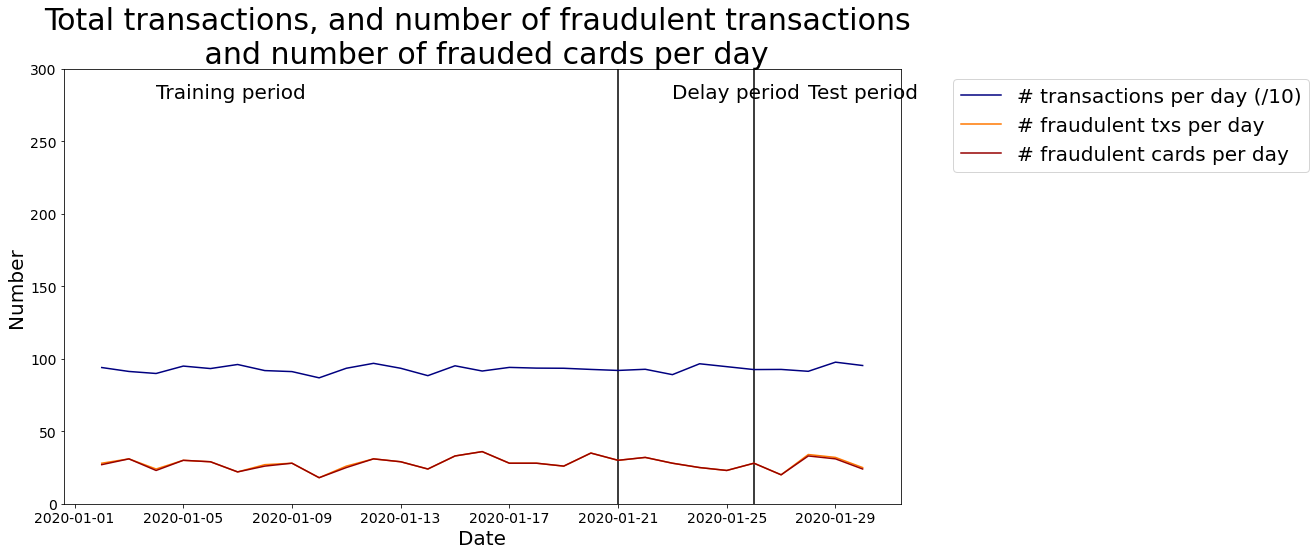

In [33]:
cmap = plt.get_cmap('jet')
colors={'nb_tx_per_day':cmap(0), 
        'nb_fraudulent_transactions_per_day':cmap(200), 
        'nb_frauded_cards_per_day':cmap(250)}

fraud_and_transactions_stats_fig, ax = plt.subplots(1, 1, figsize=(15,8))

# Training period
start_date_training = datetime.datetime.strptime("2020-01-02", "%Y-%m-%d")
delta_train = 19 
delta_delay = 5
delta_test = 5

end_date_training = start_date_training+datetime.timedelta(days=delta_train-1)

# Test period
start_date_test = start_date_training+datetime.timedelta(days=delta_train+delta_delay)
end_date_test = start_date_training+datetime.timedelta(days=delta_train+delta_delay+delta_test-1)

get_template_tx_stats(ax, fs=20,
                      start_date_training=start_date_training,
                      title='Total transactions, and number of fraudulent transactions \n and number of frauded cards per day',
                      delta_train=delta_train,
                      delta_delay=delta_delay,
                      delta_test=delta_test
                     )

ax.plot(tx_stats['fecha'], tx_stats['nb_tx_per_day']/10, 'b', color=colors['nb_tx_per_day'], label = '# transactions per day (/10)')
ax.plot(tx_stats['fecha'], tx_stats['nb_fraudulent_transactions_per_day'], 'b', color=colors['nb_fraudulent_transactions_per_day'], label = '# fraudulent txs per day')
ax.plot(tx_stats['fecha'], tx_stats['nb_frauded_cards_per_day'], 'b', color=colors['nb_frauded_cards_per_day'], label = '# fraudulent cards per day')

ax.legend(loc = 'upper left',bbox_to_anchor=(1.05, 1),fontsize=20)

In [639]:
print(end_date_training)
print(start_date_test)
print(end_date_test)

2020-01-20 00:00:00
2020-01-26 00:00:00
2020-01-30 00:00:00


In [34]:
(train_df, test_df)=get_train_test_set(df_3,start_date_training,
                                       delta_train=19,delta_delay=5,delta_test=5)

In [41]:
train_df.shape

(17626, 35)

In [42]:
train_df[train_df.fraude==1].shape

(533, 35)

In [645]:
train_df.fraude.value_counts(normalize=True)

False    0.969761
True     0.030239
Name: fraude, dtype: float64

In [646]:
test_df.shape

(3759, 35)

In [647]:
test_df[test_df.fraude==1].shape

(110, 35)

In [648]:
test_df.fraude.value_counts(normalize=True)

False    0.970737
True     0.029263
Name: fraude, dtype: float64

In [651]:
train_df.head()

,TID,ID_USER,genero,monto,fecha,hora,dispositivo,establecimiento,ciudad,tipo_tc,linea_tc,interes_tc,status_txn,is_prime,dcto,cashback,fraude,dif_fechas_tran,fecha_weeday,flag_weekend,flag_night,flag_nulo_estable,flag_nulo_ciudad,CUSTOMER_ID_NB_TX_1DAY_WINDOW,CUSTOMER_ID_AVG_AMOUNT_1DAY_WINDOW,CUSTOMER_ID_NB_TX_7DAY_WINDOW,CUSTOMER_ID_AVG_AMOUNT_7DAY_WINDOW,CUSTOMER_ID_NB_TX_28DAY_WINDOW,CUSTOMER_ID_AVG_AMOUNT_28DAY_WINDOW,dispositivo_NB_TX_1DAY_WINDOW,dispositivo_RISK_1DAY_WINDOW,dispositivo_NB_TX_7DAY_WINDOW,dispositivo_RISK_7DAY_WINDOW,dispositivo_NB_TX_28DAY_WINDOW,dispositivo_RISK_28DAY_WINDOW
12583,1,0,F,88.719243,2020-01-15,7,2.0,Nulo,Merida,Virtual,71000,51,Aceptada,False,0.000000,1.774385,False,0.0,2,0,0,1,0,1.0,88.719243,1.0,88.719243,1.0,88.719243,56.0,0.053571,326.0,0.027607,326.0,0.027607
14678,2,1,F,790.037653,2020-01-17,11,1.0,Nulo,Guadalajara,Virtual,94000,56,En proceso,False,0.000000,15.800753,False,6.0,4,1,0,1,0,1.0,790.037653,2.0,556.151029,4.0,553.455866,35.0,0.057143,296.0,0.033784,399.0,0.032581
3693,3,1,F,767.005387,2020-01-05,11,11.0,MPago,Guadalajara,Física,94000,56,Aceptada,False,0.000000,7.670054,False,0.0,6,1,0,0,0,1.0,767.005387,1.0,767.005387,1.0,767.005387,0.0,0.000000,0.0,0.000000,0.0,0.000000
4258,6,1,F,334.516017,2020-01-06,2,0.0,Abarrotes,Guadalajara,Física,94000,56,Aceptada,False,33.451602,3.010644,False,1.0,0,0,0,0,0,1.0,334.516017,2.0,550.760702,2.0,550.760702,0.0,0.000000,0.0,0.000000,0.0,0.000000
8671,7,1,F,322.264405,2020-01-11,13,12.0,MPago,Guadalajara,Física,94000,56,Aceptada,False,0.000000,3.222644,False,5.0,5,1,0,0,0,1.0,322.264405,3.0,474.595270,3.0,474.595270,54.0,0.000000,154.0,0.032468,154.0,0.032468


Al momento de pasar esto a producción y recibir data sin etiqueta de fraude, se debe trabajar con un score de riesgo previo, es por eso que se guarda los valores de training para acoplar los valores a las variables de test. De todas maneras, estos valores cambiarían periódicamente pero como un primer pase a producción se puede comenzar con ello.

In [35]:
temp=train_df.groupby(['dispositivo'],as_index=False)[['dispositivo_NB_TX_1DAY_WINDOW','dispositivo_NB_TX_7DAY_WINDOW','dispositivo_NB_TX_28DAY_WINDOW']].max()
dispositivo_RISK_1DAY_WINDOW=[]
dispositivo_RISK_7DAY_WINDOW=[]
dispositivo_RISK_28DAY_WINDOW=[]
for i in range(len(temp)):
    dispositivo_RISK_1DAY_WINDOW.append(train_df[(train_df['dispositivo']==dict(temp.loc[i])['dispositivo'])&(train_df['dispositivo_NB_TX_1DAY_WINDOW']==dict(temp.loc[i])['dispositivo_NB_TX_1DAY_WINDOW'])]['dispositivo_RISK_1DAY_WINDOW'].unique()[0])
    dispositivo_RISK_7DAY_WINDOW.append(train_df[(train_df['dispositivo']==dict(temp.loc[i])['dispositivo'])&(train_df['dispositivo_NB_TX_7DAY_WINDOW']==dict(temp.loc[i])['dispositivo_NB_TX_7DAY_WINDOW'])]['dispositivo_RISK_7DAY_WINDOW'].unique()[0])
    dispositivo_RISK_28DAY_WINDOW.append(train_df[(train_df['dispositivo']==dict(temp.loc[i])['dispositivo'])&(train_df['dispositivo_NB_TX_28DAY_WINDOW']==dict(temp.loc[i])['dispositivo_NB_TX_28DAY_WINDOW'])]['dispositivo_RISK_28DAY_WINDOW'].unique()[0])
    
temp['dispositivo_RISK_1DAY_WINDOW']=dispositivo_RISK_1DAY_WINDOW
temp['dispositivo_RISK_7DAY_WINDOW']=dispositivo_RISK_7DAY_WINDOW
temp['dispositivo_RISK_28DAY_WINDOW']=dispositivo_RISK_28DAY_WINDOW
temp.to_csv('temp_dispositivos.csv.gzip',compression='gzip',index=False)

## Mean Encoding

Antes de pasar a la etapa de entrenamiento del modelo, se transforma las variables categóricas en numéricas y para ello, se usará la técnica de mean encoding que convierte a la categoría de acuerdo a su proporción con el target.

Las variables consideradas como categóricas:

* Genero
* Hora
* Dispositivo
* Establecimiento
* Ciudad
* Dif_fechas_tran
* tipo_tc
* Status_txn
* is_prime
* fecha_weeday

In [36]:
mean_feat=['fraude','genero','hora','dispositivo','establecimiento','ciudad','dif_fechas_tran','tipo_tc','status_txn','is_prime','fecha_weeday']
train_df[mean_feat].to_csv('train_mean_encod_vol.csv.gzip',compression='gzip')

In [37]:
train_X,val_X,train_y,val_y=train_test_split(train_df.drop(columns=['fraude']),train_df.fraude,test_size=0.2,random_state=0,stratify=train_df[['fraude']])

In [38]:
train_X['fraude']=train_y
train_X['fraude']=train_X['fraude'].astype('int')
val_X['fraude']=val_y
val_X['fraude']=val_X['fraude'].astype('int')

In [39]:
categories=['genero','hora','dispositivo','establecimiento','dif_fechas_tran','ciudad','tipo_tc','status_txn','is_prime','fecha_weeday']
(train_data_me,val_data_me)=mean_encode(train_X,val_X,categories,'fraude',reg_method='k_fold',alpha=5,folds=4)

categoricals=list(train_data_me.columns)

In [40]:
train_data_final=train_X.drop(categories,axis=1).join(train_data_me)
val_data_final=val_X.drop(categories,axis=1).join(val_data_me)

In [41]:
train_df_final=pd.concat([train_data_final,val_data_final])
del train_data_final,val_data_final

In [49]:
train_df_final.head()

,TID,ID_USER,monto,fecha,linea_tc,interes_tc,dcto,cashback,flag_weekend,flag_night,flag_nulo_estable,flag_nulo_ciudad,CUSTOMER_ID_NB_TX_1DAY_WINDOW,CUSTOMER_ID_AVG_AMOUNT_1DAY_WINDOW,CUSTOMER_ID_NB_TX_7DAY_WINDOW,CUSTOMER_ID_AVG_AMOUNT_7DAY_WINDOW,CUSTOMER_ID_NB_TX_28DAY_WINDOW,CUSTOMER_ID_AVG_AMOUNT_28DAY_WINDOW,dispositivo_NB_TX_1DAY_WINDOW,dispositivo_RISK_1DAY_WINDOW,dispositivo_NB_TX_7DAY_WINDOW,dispositivo_RISK_7DAY_WINDOW,dispositivo_NB_TX_28DAY_WINDOW,dispositivo_RISK_28DAY_WINDOW,fraude,mean_fraude_genero,mean_fraude_hora,mean_fraude_dispositivo,mean_fraude_establecimiento,mean_fraude_dif_fechas_tran,mean_fraude_ciudad,mean_fraude_tipo_tc,mean_fraude_status_txn,mean_fraude_is_prime,mean_fraude_fecha_weeday
1403,4620,709,883.301254,2020-01-03,81000,57,88.330125,7.949711,1,1,0,1,1.0,883.301254,2.0,897.338867,2.0,897.338867,0.0,0.000000,0.0,0.000000,0.0,0.000000,0,0.032348,0.019470,0.041020,0.031293,0.027595,0.030489,0.030344,0.034526,0.030679,0.028404
9639,352,54,395.306414,2020-01-12,35000,40,39.530641,3.557758,1,0,0,0,1.0,395.306414,3.0,271.787978,4.0,325.855804,43.0,0.023256,182.0,0.038462,182.0,0.038462,0,0.026557,0.029918,0.019984,0.027765,0.022460,0.027037,0.030381,0.029650,0.030306,0.030197
4833,19299,2842,805.592287,2020-01-07,48000,50,0.000000,8.055923,0,0,1,0,1.0,805.592287,2.0,736.307366,2.0,736.307366,0.0,0.000000,0.0,0.000000,0.0,0.000000,0,0.026557,0.020112,0.038456,0.035788,0.028246,0.024192,0.030381,0.030083,0.030306,0.025437
16228,13876,2072,917.510465,2020-01-19,77000,59,0.000000,9.175105,1,0,0,0,1.0,917.510465,2.0,460.413414,4.0,517.681508,47.0,0.042553,319.0,0.037618,506.0,0.031621,0,0.026557,0.029821,0.030764,0.026824,0.032474,0.034797,0.030381,0.029650,0.029950,0.030197
3629,21543,3189,30.283483,2020-01-05,35000,33,0.000000,0.302835,1,0,1,0,1.0,30.283483,3.0,386.898907,3.0,386.898907,0.0,0.000000,0.0,0.000000,0.0,0.000000,0,0.032348,0.029420,0.038165,0.031634,0.029312,0.033346,0.030344,0.034526,0.030679,0.031247


# Model Training

In [42]:
output_feature="fraude"

input_features=['monto',
 'linea_tc',
 'interes_tc',
 'dcto',
 'cashback',
 'flag_weekend',
 'flag_night',
 'flag_nulo_estable',
 'flag_nulo_ciudad',
 'CUSTOMER_ID_NB_TX_1DAY_WINDOW',
 'CUSTOMER_ID_AVG_AMOUNT_1DAY_WINDOW',
 'CUSTOMER_ID_NB_TX_7DAY_WINDOW',
 'CUSTOMER_ID_AVG_AMOUNT_7DAY_WINDOW',
 'CUSTOMER_ID_NB_TX_28DAY_WINDOW',
 'CUSTOMER_ID_AVG_AMOUNT_28DAY_WINDOW',
 'dispositivo_NB_TX_1DAY_WINDOW',
 'dispositivo_RISK_1DAY_WINDOW',
 'dispositivo_NB_TX_7DAY_WINDOW',
 'dispositivo_RISK_7DAY_WINDOW',
 'dispositivo_NB_TX_28DAY_WINDOW',
 'dispositivo_RISK_28DAY_WINDOW',
 'mean_fraude_genero',
 'mean_fraude_hora',
 'mean_fraude_dispositivo',
 'mean_fraude_establecimiento',
 'mean_fraude_dif_fechas_tran',
 'mean_fraude_ciudad',
 'mean_fraude_tipo_tc',
 'mean_fraude_status_txn',
 'mean_fraude_is_prime',
 'mean_fraude_fecha_weeday']

## Test_df_final

Se aplica la técnica de mean encoding al test set con las variables y target tomado para el train

In [43]:
train_data=pd.read_csv('train_mean_encod_vol.csv.gzip',compression='gzip',index_col='Unnamed: 0')
final_ind=train_data.shape[0]
train_data.index=range(test_df.shape[0]+1,test_df.shape[0]+1+final_ind)

In [44]:
(_,df_test_me)=mean_encode(train_data,test_df,categories,'fraude',reg_method='k_fold',alpha=5,folds=4)
del _,train_data,final_ind

In [45]:
test_df_final=test_df.drop(categories,axis=1).join(df_test_me)
del df_test_me
test_df_final['fraude']=test_df_final['fraude'].astype('int')
test_df_final.head()

,TID,ID_USER,monto,fecha,linea_tc,interes_tc,dcto,cashback,fraude,flag_weekend,flag_night,flag_nulo_estable,flag_nulo_ciudad,CUSTOMER_ID_NB_TX_1DAY_WINDOW,CUSTOMER_ID_AVG_AMOUNT_1DAY_WINDOW,CUSTOMER_ID_NB_TX_7DAY_WINDOW,CUSTOMER_ID_AVG_AMOUNT_7DAY_WINDOW,CUSTOMER_ID_NB_TX_28DAY_WINDOW,CUSTOMER_ID_AVG_AMOUNT_28DAY_WINDOW,dispositivo_NB_TX_1DAY_WINDOW,dispositivo_RISK_1DAY_WINDOW,dispositivo_NB_TX_7DAY_WINDOW,dispositivo_RISK_7DAY_WINDOW,dispositivo_NB_TX_28DAY_WINDOW,dispositivo_RISK_28DAY_WINDOW,mean_fraude_genero,mean_fraude_hora,mean_fraude_dispositivo,mean_fraude_establecimiento,mean_fraude_dif_fechas_tran,mean_fraude_ciudad,mean_fraude_tipo_tc,mean_fraude_status_txn,mean_fraude_is_prime,mean_fraude_fecha_weeday
26215,4,1,254.171053,2020-01-30,94000,56,0.000000,2.541711,0,0,0,1,0,1.0,254.171053,2.0,145.587400,7.0,488.113724,48.0,0.041667,325.0,0.040000,1030.0,0.033010,0.033155,0.027117,0.031244,0.033326,0.034907,0.032190,0.030805,0.029532,0.030615,0.033232
24000,5,1,37.003747,2020-01-27,94000,56,0.000000,0.370037,0,0,0,1,0,1.0,37.003747,1.0,37.003747,6.0,527.104169,48.0,0.020833,316.0,0.025316,884.0,0.026018,0.033155,0.025501,0.026042,0.033326,0.055485,0.032190,0.030805,0.031615,0.030615,0.033268
26363,12,2,436.950266,2020-01-30,55000,57,87.390053,6.991204,0,0,0,0,0,1.0,436.950266,2.0,438.128289,6.0,365.146539,44.0,0.045455,303.0,0.026403,1024.0,0.031250,0.033155,0.029834,0.030235,0.027705,0.029991,0.026374,0.028932,0.031979,0.030615,0.033232
22814,13,2,439.306312,2020-01-26,55000,57,0.000000,4.393063,0,1,0,0,0,1.0,439.306312,1.0,439.306312,5.0,350.785794,47.0,0.000000,323.0,0.030960,857.0,0.030338,0.033155,0.025002,0.029738,0.027705,0.055485,0.026374,0.030805,0.029532,0.030615,0.030483
26974,14,2,599.014183,2020-01-30,55000,57,119.802837,4.792113,0,0,1,0,0,2.0,517.982224,3.0,491.756920,7.0,398.556202,47.0,0.085106,330.0,0.042424,1035.0,0.030918,0.033155,0.037810,0.029902,0.030996,0.029359,0.026374,0.030805,0.029532,0.030615,0.033232


In [94]:
train_df.head()

,TID,ID_USER,genero,monto,fecha,hora,dispositivo,establecimiento,ciudad,tipo_tc,linea_tc,interes_tc,status_txn,is_prime,dcto,cashback,fraude,dif_fechas_tran,fecha_weeday,flag_weekend,flag_night,flag_nulo_estable,flag_nulo_ciudad,CUSTOMER_ID_NB_TX_1DAY_WINDOW,CUSTOMER_ID_AVG_AMOUNT_1DAY_WINDOW,CUSTOMER_ID_NB_TX_7DAY_WINDOW,CUSTOMER_ID_AVG_AMOUNT_7DAY_WINDOW,CUSTOMER_ID_NB_TX_28DAY_WINDOW,CUSTOMER_ID_AVG_AMOUNT_28DAY_WINDOW,dispositivo_NB_TX_1DAY_WINDOW,dispositivo_RISK_1DAY_WINDOW,dispositivo_NB_TX_7DAY_WINDOW,dispositivo_RISK_7DAY_WINDOW,dispositivo_NB_TX_28DAY_WINDOW,dispositivo_RISK_28DAY_WINDOW
12583,1,0,F,88.719243,2020-01-15,7,2.0,Nulo,Merida,Virtual,71000,51,Aceptada,False,0.000000,1.774385,False,0.0,2,0,0,1,0,1.0,88.719243,1.0,88.719243,1.0,88.719243,56.0,0.053571,326.0,0.027607,326.0,0.027607
14678,2,1,F,790.037653,2020-01-17,11,1.0,Nulo,Guadalajara,Virtual,94000,56,En proceso,False,0.000000,15.800753,False,6.0,4,1,0,1,0,1.0,790.037653,2.0,556.151029,4.0,553.455866,35.0,0.057143,296.0,0.033784,399.0,0.032581
3693,3,1,F,767.005387,2020-01-05,11,11.0,MPago,Guadalajara,Física,94000,56,Aceptada,False,0.000000,7.670054,False,0.0,6,1,0,0,0,1.0,767.005387,1.0,767.005387,1.0,767.005387,0.0,0.000000,0.0,0.000000,0.0,0.000000
4258,6,1,F,334.516017,2020-01-06,2,0.0,Abarrotes,Guadalajara,Física,94000,56,Aceptada,False,33.451602,3.010644,False,1.0,0,0,0,0,0,1.0,334.516017,2.0,550.760702,2.0,550.760702,0.0,0.000000,0.0,0.000000,0.0,0.000000
8671,7,1,F,322.264405,2020-01-11,13,12.0,MPago,Guadalajara,Física,94000,56,Aceptada,False,0.000000,3.222644,False,5.0,5,1,0,0,0,1.0,322.264405,3.0,474.595270,3.0,474.595270,54.0,0.000000,154.0,0.032468,154.0,0.032468


## Modelling

### Decision tree Classifier

Como modelo base se toma el decision tree classifier. Para ello, se crea una función que hará el pipeline completo de entrenar y predecir la probabilidad de fraude tanto para el train como para el test y se guarda en un diccionario. Cabe resaltar que en ese diccionario también se guarda el modelo como objeto. Adicional a ello, en el pipeline se considera el tratamiento de clases imbalaceadas presentes en este sistema. Por tal motivo, se plantea dos estrategias para abordar ese obstáculo: Usar undersampling y oversampling y usar smote con undersampling. Para el primer caso se trabaja el argumento res_smote en False y se brinda el argumento escal que es el multiplicador para el oversampling, mientras que la otra técnica trabaja res_smote en True y con los argumentos over (para Smote) y under

In [671]:
classifier = DecisionTreeClassifier(max_depth = 2, random_state=0)

model_and_predictions_dictionary = fit_model_and_get_predictions(classifier, train_df_final, test_df_final, 
                                                                 input_features, output_feature,
                                                                 res_smote=False,escal=5,over=0.2,under=0.4)

In [672]:
train_df_final['predictions']=model_and_predictions_dictionary['predictions_train']
test_df_final['predictions']=model_and_predictions_dictionary['predictions_test']
test_df_final.head()

,TID,ID_USER,monto,fecha,linea_tc,interes_tc,dcto,cashback,fraude,flag_weekend,flag_night,flag_nulo_estable,flag_nulo_ciudad,CUSTOMER_ID_NB_TX_1DAY_WINDOW,CUSTOMER_ID_AVG_AMOUNT_1DAY_WINDOW,CUSTOMER_ID_NB_TX_7DAY_WINDOW,CUSTOMER_ID_AVG_AMOUNT_7DAY_WINDOW,CUSTOMER_ID_NB_TX_28DAY_WINDOW,CUSTOMER_ID_AVG_AMOUNT_28DAY_WINDOW,dispositivo_NB_TX_1DAY_WINDOW,dispositivo_RISK_1DAY_WINDOW,dispositivo_NB_TX_7DAY_WINDOW,dispositivo_RISK_7DAY_WINDOW,dispositivo_NB_TX_28DAY_WINDOW,dispositivo_RISK_28DAY_WINDOW,mean_fraude_genero,mean_fraude_hora,mean_fraude_dispositivo,mean_fraude_establecimiento,mean_fraude_dif_fechas_tran,mean_fraude_ciudad,mean_fraude_tipo_tc,mean_fraude_status_txn,mean_fraude_is_prime,mean_fraude_fecha_weeday,predictions
26215,4,1,254.171053,2020-01-30,94000,56,0.000000,2.541711,0,0,0,1,0,1.0,254.171053,2.0,145.587400,7.0,488.113724,48.0,0.041667,325.0,0.040000,1030.0,0.033010,0.033155,0.027117,0.031244,0.033326,0.034907,0.032190,0.030805,0.029532,0.030615,0.033232,0.152668
24000,5,1,37.003747,2020-01-27,94000,56,0.000000,0.370037,0,0,0,1,0,1.0,37.003747,1.0,37.003747,6.0,527.104169,48.0,0.020833,316.0,0.025316,884.0,0.026018,0.033155,0.025501,0.026042,0.033326,0.055485,0.032190,0.030805,0.031615,0.030615,0.033268,0.165663
26363,12,2,436.950266,2020-01-30,55000,57,87.390053,6.991204,0,0,0,0,0,1.0,436.950266,2.0,438.128289,6.0,365.146539,44.0,0.045455,303.0,0.026403,1024.0,0.031250,0.033155,0.029834,0.030235,0.027705,0.029991,0.026374,0.028932,0.031979,0.030615,0.033232,0.152668
22814,13,2,439.306312,2020-01-26,55000,57,0.000000,4.393063,0,1,0,0,0,1.0,439.306312,1.0,439.306312,5.0,350.785794,47.0,0.000000,323.0,0.030960,857.0,0.030338,0.033155,0.025002,0.029738,0.027705,0.055485,0.026374,0.030805,0.029532,0.030615,0.030483,0.152668
26974,14,2,599.014183,2020-01-30,55000,57,119.802837,4.792113,0,0,1,0,0,2.0,517.982224,3.0,491.756920,7.0,398.556202,47.0,0.085106,330.0,0.042424,1035.0,0.030918,0.033155,0.037810,0.029902,0.030996,0.029359,0.026374,0.030805,0.029532,0.030615,0.033232,0.152668


In [673]:
roc_auc_score(train_df_final['fraude'],train_df_final['predictions'])

0.5408253864275656

In [674]:
roc_auc_score(test_df_final['fraude'],test_df_final['predictions'])

0.5131704825730586

Midamos el perfomance del modelo. Para ello, calcularemos 3 métricas de evaluación: AUC ROC, Average Precision (AP) y Card Precision top-k (CP@k):

* Card Precision top-k: Más pragmática e interpretable métrica. Toma en consideración el hecho que investigadores solo pueden revisar un máximo de k potenciales fraudulentas tarjetas por día. Es calculado por rankear para todos los días en el test las transacciones más fraudulentas y seleccionar las k tarjetas cuyas transacciones tienen la más alta probabilidad de fraude. La precisión (proporción de tarjetas fraudulenats reales sobre las tarjetas fraudulentas predichas) es entonces calculado para cada dia. Esta métrica es el promedio de esas precisiones diarias. El número k será establecido como 100 que se asume que 100 tarjetas pueden ser revisadas por día.
* Average precision es un símil para Card Precision top-k, que integra la precisión para todos los k posibles.
* AUC ROC es una medida alternativa al AP ya que brinda más importancia a los scores obtenidos con valores de k más altos. Eso es menos relevante en práctica debido a que la perfomance que más nos importa son esas para valores más pequeños de k.

In [675]:
performance_assessment(test_df_final, top_k_list=[100])

,AUC ROC,Average precision,Card Precision@100
0,0.513,0.03,0.04


La métrica Card Precision@100 nos dice que todos los días, 4% de las tarjetas con las más altas probabilidades de fraude eran realmente fraude. Ya que el porcentaje de fraudes en el test es de 3%, esta proporción de fraudes detectados es un poco más alto lo que significa que el modelo si esta diferenciando un poco mejor

Las otras meétricas se comparan con un AUC ROC de 0.5 y AP de 0.029263, lo cual si tenemos valores más altos y por lo tanto un mejor modelo que la base.

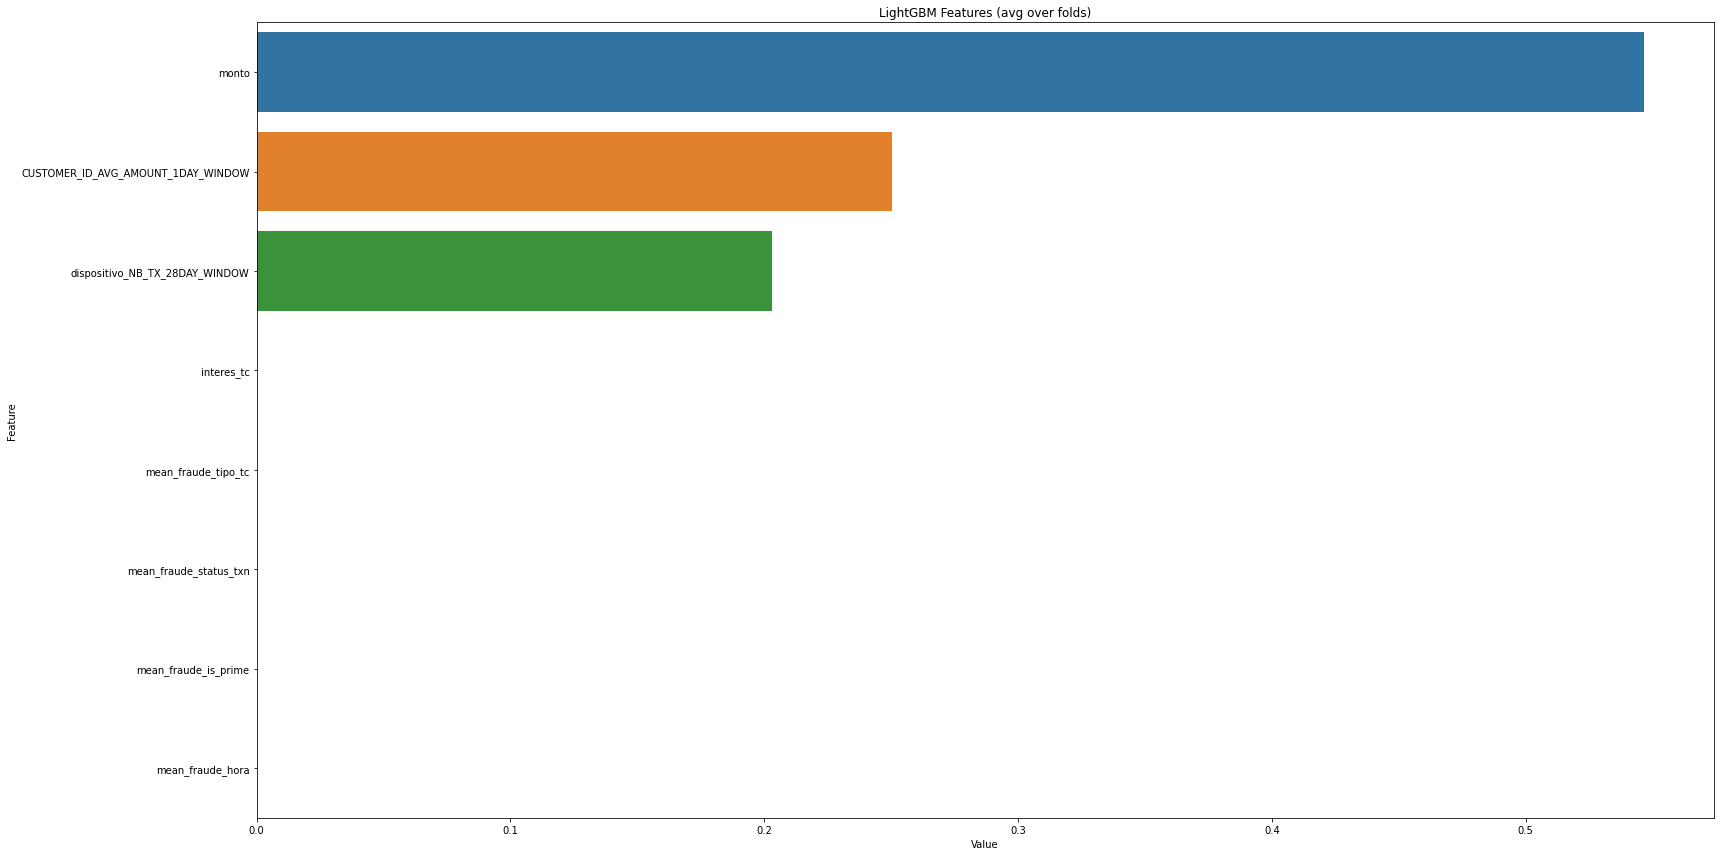

In [676]:
feature_imp = pd.DataFrame(sorted(zip(classifier.feature_importances_,train_df_final[input_features].columns)), columns=['Value','Feature'])

#feature_imp.to_csv('Eval_model_2/feature_imp.csv',index=False)

plt.figure(figsize=(24, 12))
sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value", ascending=False).iloc[:8])
plt.title('LightGBM Features (avg over folds)')
plt.tight_layout()
plt.show()

Por otro lado, en cuanto a las variables que tienen más importancia en este modelo, tenemos 3 que resaltan más por mucha diferencia: monto, el promedio de monto que tiene un cliente en una venta de tiempo de 1 día y la cantidad de tarjetas fraudulentas que hayan pasado por un dispositivo en los últimos 28 días.

### Many models

Hacemos un benchmark de los siguientes modelos:

* Regresión logística
* Decisiion tree with depth of two
* Decision tree - unlimited depth
* Random forest
* XGBoost
* Lightgbm

In [46]:
params = {'learning_rate': 0.01,
              'application': 'binary',
              'num_leaves': 128,
              'verbosity': -1,
              'metric': 'auc',
              'bagging_fraction': 0.8,
              'feature_fraction': 0.6,
              'nthread': 4,
              'lambda_l1': 1,
              'lambda_l2': 1,
         'is_unbalance':True,
         'random_state':42,
         'max_depth':10}


classifiers_dictionary={'Logistic regression':LogisticRegression(random_state=0), 
                        'Decision tree with depth of two':DecisionTreeClassifier(max_depth=2,random_state=0), 
                        'Decision tree - unlimited depth':DecisionTreeClassifier(random_state=0), 
                        'Random forest':RandomForestClassifier(random_state=0,n_jobs=-1),
                        'XGBoost':xgb.XGBClassifier(random_state=0,n_jobs=-1),
                        'Lightgbm':lgb.LGBMClassifier(**params),
                       }

fitted_models_and_predictions_dictionary={}

for classifier_name in classifiers_dictionary:
    
    model_and_predictions = fit_model_and_get_predictions(classifiers_dictionary[classifier_name], train_df_final, test_df_final, 
                                                                                  input_features=input_features,
                                                                                output_feature=output_feature,
                                                         res_smote=False,escal=5,over=0.1,under=0.4)
    fitted_models_and_predictions_dictionary[classifier_name]=model_and_predictions

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].


[01:45:39] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[LightGBM] [Warning] num_threads is set with n_jobs=-1, nthread=4 will be ignored. Current value: num_threads=-1
[LightGBM] [Warning] feature_fraction is set=0.6, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6
[LightGBM] [Warning] lambda_l1 is set=1, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] lambda_l2 is set=1, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1


In [47]:
# performances on test set
df_performances=performance_assessment_model_collection(fitted_models_and_predictions_dictionary, test_df_final, 
                                                        type_set='test', 
                                                        top_k_list=[100])
df_performances

,AUC ROC,Average precision,Card Precision@100
Logistic regression,0.522,0.032,0.040
Decision tree with depth of two,0.513,0.030,0.040
Decision tree - unlimited depth,0.484,0.029,0.034
Random forest,0.509,0.033,0.036
XGBoost,0.520,0.033,0.034
Lightgbm,0.486,0.027,0.028


In [56]:
# Execution times
df_execution_times=execution_times_model_collection(fitted_models_and_predictions_dictionary)
df_execution_times

,Training execution time,Prediction execution time
Logistic regression,0.507894,0.011613
Decision tree with depth of two,0.216873,0.008995
Decision tree - unlimited depth,0.796301,0.006982
Random forest,1.812604,0.226601
XGBoost,2.476439,0.010571
Lightgbm,0.871029,0.028684


Comentarios de modelos entrenados:

* Considerando la métrica Card Precision@100, todos los modelos tienen una mejora en comparación con la base excepto el lightgbm
* EL modelo Decision tree - unlimited depth	solo es mejor en cuanto a la métrica de Card Precision@100, en las demás métricas está debajo de la base
* EL mejor modelo es el de regresión logística pues casi todas sus métricas son las mejores
* Estos modelos se pueden seguir optimizando con más data, buscando otras variables y métodos de optimización
* El tiempo de ejecución de los modelos de decision tree son los mejores para predicir

c:\users\rosorio\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
c:\users\rosorio\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://

[23:20:00] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


c:\users\rosorio\appdata\local\programs\python\python37\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[23:20:00] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


c:\users\rosorio\appdata\local\programs\python\python37\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[23:20:01] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


c:\users\rosorio\appdata\local\programs\python\python37\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[23:20:02] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


c:\users\rosorio\appdata\local\programs\python\python37\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[23:20:03] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


c:\users\rosorio\appdata\local\programs\python\python37\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[23:20:05] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


c:\users\rosorio\appdata\local\programs\python\python37\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[23:20:05] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


c:\users\rosorio\appdata\local\programs\python\python37\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[23:20:06] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


c:\users\rosorio\appdata\local\programs\python\python37\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[23:20:07] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


c:\users\rosorio\appdata\local\programs\python\python37\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[23:20:08] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


c:\users\rosorio\appdata\local\programs\python\python37\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[23:20:10] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


c:\users\rosorio\appdata\local\programs\python\python37\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[23:20:10] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


c:\users\rosorio\appdata\local\programs\python\python37\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[23:20:11] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


c:\users\rosorio\appdata\local\programs\python\python37\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[23:20:12] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


c:\users\rosorio\appdata\local\programs\python\python37\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[23:20:13] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[LightGBM] [Warning] num_threads is set with n_jobs=-1, nthread=4 will be ignored. Current value: num_threads=-1
[LightGBM] [Warning] feature_fraction is set=0.6, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6
[LightGBM] [Warning] lambda_l1 is set=1, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] lambda_l2 is set=1, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1
[LightGBM] [Warning] num_threads is set with n_jobs=-1, nthread=4 will be ignored. Current value: num_threads=-1
[LightGBM] [Warning] fea

<module 'matplotlib.pyplot' from 'c:\\users\\rosorio\\appdata\\local\\programs\\python\\python37\\lib\\site-packages\\matplotlib\\pyplot.py'>

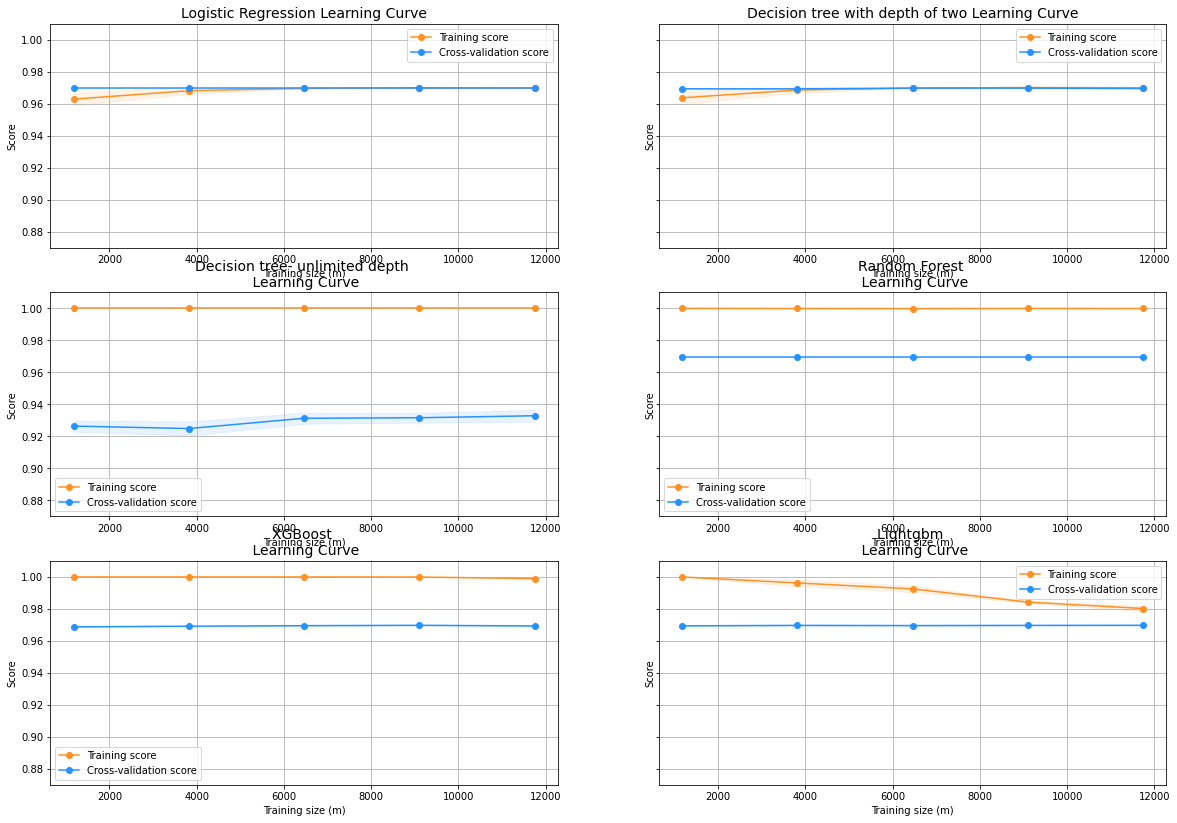

In [67]:
#cv = ShuffleSplit(n_splits=4000, test_size=0.2, random_state=42)
plot_learning_curve(fitted_models_and_predictions_dictionary['Logistic regression']['classifier'], 
                    fitted_models_and_predictions_dictionary['Decision tree with depth of two']['classifier'],
                    fitted_models_and_predictions_dictionary['Decision tree - unlimited depth']['classifier'],
                    fitted_models_and_predictions_dictionary['Random forest']['classifier'],
                    fitted_models_and_predictions_dictionary['XGBoost']['classifier'],
                    fitted_models_and_predictions_dictionary['Lightgbm']['classifier'],
                    train_df_final[input_features], train_df_final[output_feature], (0.87, 1.01), cv=3, n_jobs=1)

In [70]:
est1_fpr, est1_tpr, est1_thresold = roc_curve(test_df_final['fraude'], fitted_models_and_predictions_dictionary['Logistic regression']['predictions_test'])
est2_fpr, est2_tpr, est2_threshold = roc_curve(test_df_final['fraude'], fitted_models_and_predictions_dictionary['Decision tree with depth of two']['predictions_test'])
est3_fpr, est3_tpr, est3_threshold = roc_curve(test_df_final['fraude'], fitted_models_and_predictions_dictionary['Decision tree - unlimited depth']['predictions_test'])
est4_fpr, est4_tpr, est4_threshold = roc_curve(test_df_final['fraude'], fitted_models_and_predictions_dictionary['Random forest']['predictions_test'])
est5_fpr, est5_tpr, est5_threshold = roc_curve(test_df_final['fraude'], fitted_models_and_predictions_dictionary['XGBoost']['predictions_test'])
est6_fpr, est6_tpr, est6_threshold = roc_curve(test_df_final['fraude'], fitted_models_and_predictions_dictionary['Lightgbm']['predictions_test'])

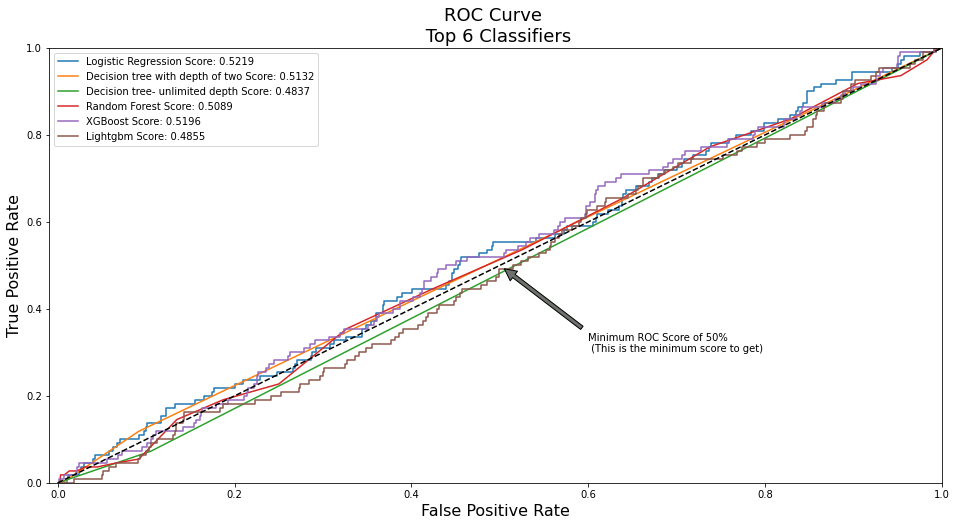

In [72]:
graph_roc_curve_multiple(est1_fpr, est1_tpr,fitted_models_and_predictions_dictionary['Logistic regression']['predictions_test'],
                         est2_fpr, est2_tpr,fitted_models_and_predictions_dictionary['Decision tree with depth of two']['predictions_test'],
                         est3_fpr, est3_tpr,fitted_models_and_predictions_dictionary['Decision tree - unlimited depth']['predictions_test'],
                         est4_fpr, est4_tpr,fitted_models_and_predictions_dictionary['Random forest']['predictions_test'],
                         est5_fpr, est5_tpr,fitted_models_and_predictions_dictionary['XGBoost']['predictions_test'],
                         est6_fpr, est6_tpr,fitted_models_and_predictions_dictionary['Lightgbm']['predictions_test'],
                         test_df_final['fraude']
                        )
plt.show()

In [73]:
# save the models
#dump(fitted_models_and_predictions_dictionary, open('models.pkl', 'wb'))
# load the models
#fitted_models_and_predictions_dictionary = load(open('models.pkl', 'rb'))

In [76]:
#fitted_models_and_predictions_dictionary['Logistic regression']['classifier'].predict_proba(test_df_final[input_features])[:,1]

#### Logistic Regression (Mejor modelo)

Para categorizar a los clienets de acuerdo con la probabilidad que bota el modelo, se trabajará con deciles y se asignará el decil si se encuentra en el intervalo de probabilidad. De esta manera, el decil 1 son aquellos que tienen probabilidad más alta de ser fraudulentos, mientras que el 10 es lo contrario. Así, se puede focalizar esfuerzos en los primeros deciles. Una métrica que ayuda a determinar que tan bien se diferencia una clase de otra al usar deciles es el ks, el cual en este caso es 5.6, que es en el decil 5

In [701]:
test_df_final['predictions']=fitted_models_and_predictions_dictionary['Logistic regression']['predictions_test']
test_ks=test_df_final.copy()
ks=ks_test(data=test_ks,target='fraude', prob='predictions')
# #ks.to_csv('Eval_model_2/ks_test.csv',index=False)

        min_prob  max_prob  events  nonevents event_rate nonevent_rate  \
Decile                                                                   
1       0.385489  0.525998      13      363.0     11.82%         9.95%   
2       0.353303  0.385369      11      365.0     10.00%        10.00%   
3       0.329823  0.353214      10      366.0      9.09%        10.03%   
4       0.311192  0.329814      14      362.0     12.73%         9.92%   
5       0.293415  0.311162      13      362.0     11.82%         9.92%   
6       0.276721  0.293347       4      372.0      3.64%        10.19%   
7       0.260741  0.276698      14      362.0     12.73%         9.92%   
8       0.241245  0.260738      12      364.0     10.91%         9.98%   
9       0.217986  0.240997      13      363.0     11.82%         9.95%   
10      0.129218  0.217917       6      370.0      5.45%        10.14%   

       cum_eventrate cum_noneventrate   KS  
Decile                                      
1             11.82% 

De manera gráfica, se observa en el gain chart que en el decil 5 se diferencia mejor el fraude y en general se tiene un curva por deciles que presenta mejores resultados que la base.

c:\users\rosorio\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,default_cum%_test,Base %
Decile,,
1,11.82,10
2,21.82,20
3,30.91,30
4,43.64,40
5,55.45,50
6,59.09,60
7,71.82,70
8,82.73,80
9,94.55,90


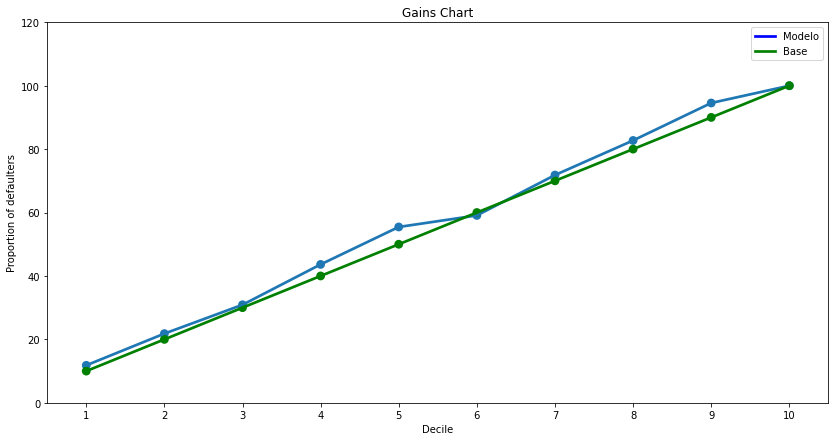

In [702]:
gain_chart=ks.copy()
gain_chart['default_cum%'] = np.round(((gain_chart['events'] / gain_chart['events'].sum()).cumsum()), 4) * 100
gain_chart2 = gain_chart[['default_cum%']]
gain_chart2.reset_index()
gain_chart2.columns = ['default_cum%_test']
gain_chart2['Base %'] = [10,20,30,40,50,60,70,80,90,100]

#gain_chart2.to_csv('Eval_model_2/gain_chart.csv',index=False)
display(gain_chart2)
fig, ax = plt.subplots(figsize=(14, 7), sharex=True)
sns.pointplot(data=gain_chart2.reset_index(), x='Decile', y='default_cum%_test')
sns.pointplot(data=gain_chart2.reset_index(), x='Decile', y='Base %',color='green')
ax.tick_params(axis='x')
ax.set(xlabel='Decile', ylabel='Proportion of defaulters')
ax.set_ylim(0,120)
ax.set_title('Gains Chart')
ax.legend(['Modelo','Base'],loc='best')
leg = ax.get_legend()
leg.legendHandles[0].set_color('blue')
leg.legendHandles[1].set_color('green')
plt.show()

Por otro lado, tenemos el lift que nos dice que en cada decil cuál es la proporción con la que se puede encontrar fraudes en comparación con la base.

,lift_test,Baseline
Decile,,
1,1.182000,1
2,1.091000,1
3,1.030333,1
4,1.091000,1
5,1.109000,1
6,0.984833,1
7,1.026000,1
8,1.034125,1
9,1.050556,1


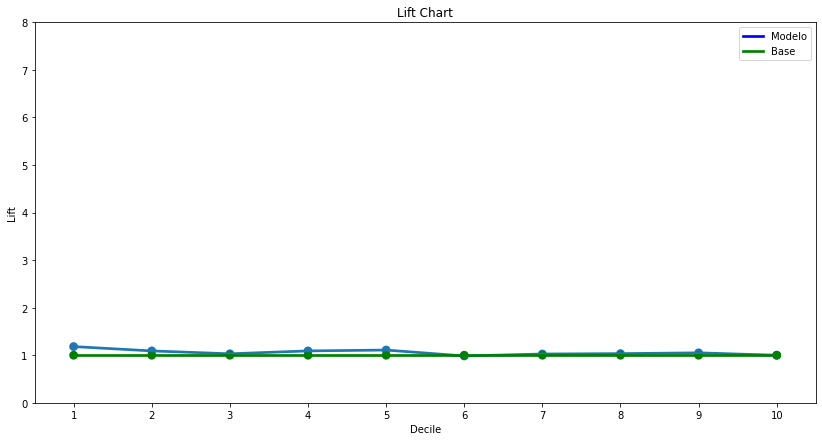

In [693]:
lift_chart=gain_chart2.copy()
lift_chart['lift_test'] = (lift_chart['default_cum%_test']/lift_chart['Base %'])
lift_chart['Baseline']  = [1,1,1,1,1,1,1,1,1,1]
lift_chart.drop(['default_cum%_test','Base %'],axis=1,inplace=True)

#lift_chart.to_csv('Eval_model_2/lift_chart.csv',index=False)

display(lift_chart)

fig, ax = plt.subplots(figsize=(14, 7), sharex=True)
sns.pointplot(data=lift_chart.reset_index(), x='Decile', y='lift_test')
sns.pointplot(data=lift_chart.reset_index(), x='Decile', y='Baseline',color='green')
ax.tick_params(axis='x')
ax.set(xlabel='Decile', ylabel='Lift')
ax.set_ylim(0,8)
ax.set_title('Lift Chart')
ax.legend(['Modelo','Base'],loc='best')
leg = ax.get_legend()
leg.legendHandles[0].set_color('blue')
leg.legendHandles[1].set_color('green')
plt.show()

Importancia de variables usando scikit learn

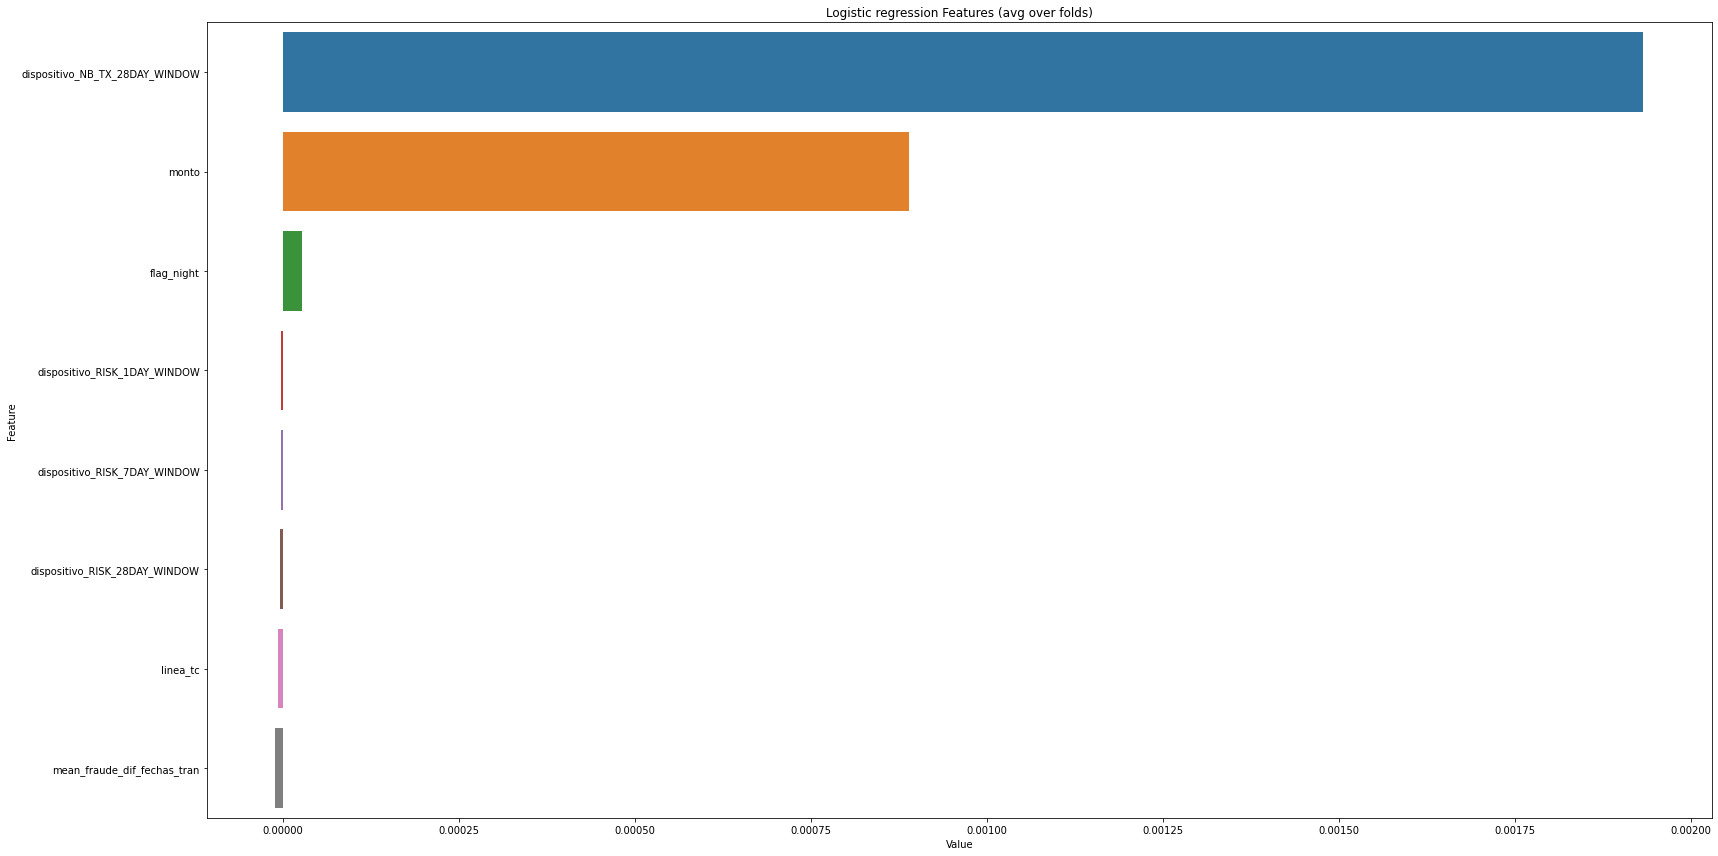

In [55]:
feature_imp = pd.DataFrame(sorted(zip(fitted_models_and_predictions_dictionary['Logistic regression']['classifier'].coef_[0],train_df_final[input_features].columns)), columns=['Value','Feature'])

#feature_imp.to_csv('Eval_model_2/feature_imp.csv',index=False)

plt.figure(figsize=(24, 12))
sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value", ascending=False).iloc[:8])
plt.title('Logistic regression Features (avg over folds)')
plt.tight_layout()
plt.show()

##### Shap Values

In [52]:
explainer = shap.LinearExplainer(fitted_models_and_predictions_dictionary['Logistic regression']['classifier'], test_df_final[input_features], feature_dependence="independent")
shap_values = explainer.shap_values(test_df_final[input_features])

The option feature_dependence has been renamed to feature_perturbation!
The option feature_perturbation="independent" is has been renamed to feature_perturbation="interventional"!
The feature_perturbation option is now deprecated in favor of using the appropriate masker (maskers.Independent, or maskers.Impute)


In [53]:
shap.initjs()

def shap_deepnote_show(plot):
    tmp_output_filename = tempfile.NamedTemporaryFile(suffix='.html').name
    shap.save_html(tmp_output_filename, plot)

    f = open(tmp_output_filename, "r")
    data = f.read()
    display(HTML(data))

Seguún shap, tenemos un ranking de las variables en donde en la parte superior encontramos a las variables que tienen mayor impacto en el cálculo de la probabilidad. Por ejemplo, para la variable monto, aquellos valores más altos de la variable tienen un impacto positivo para calcular la probabilidad, mientras que los valores más bajos tienen un impacto negativo en el calculo. Del mismo modo sucede con las demás variables

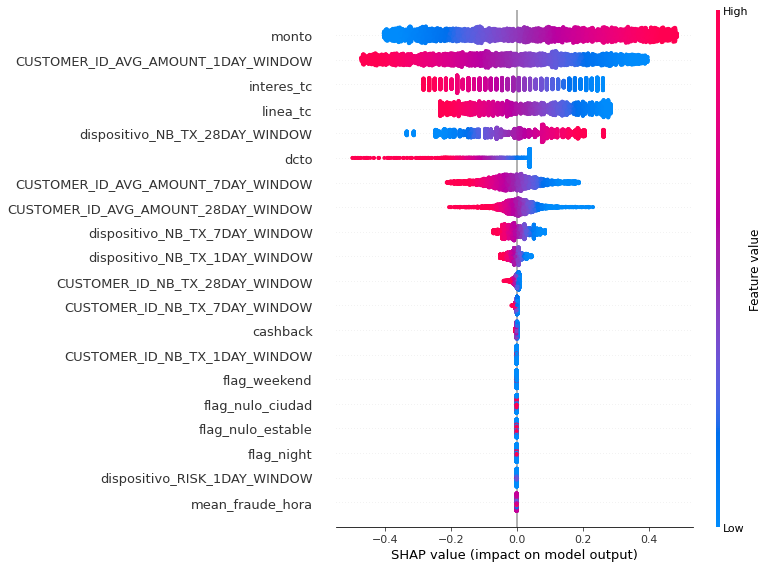

In [54]:
shap.summary_plot(shap_values, features=test_df_final[input_features], feature_names=test_df_final[input_features].columns)

#### Xgboost

In [704]:
test_df_final['predictions']=fitted_models_and_predictions_dictionary['XGBoost']['predictions_test']
test_ks=test_df_final.copy()
ks=ks_test(data=test_ks,target='fraude', prob='predictions')
# #ks.to_csv('Eval_model_2/ks_test.csv',index=False)

        min_prob  max_prob  events  nonevents event_rate nonevent_rate  \
Decile                                                                   
1       0.113416  0.707240       9      367.0      8.18%        10.06%   
2       0.064762  0.112827      12      364.0     10.91%         9.98%   
3       0.043241  0.064758      15      361.0     13.64%         9.89%   
4       0.029604  0.043219      10      366.0      9.09%        10.03%   
5       0.020020  0.029592      11      364.0     10.00%         9.98%   
6       0.014480  0.020008      13      363.0     11.82%         9.95%   
7       0.009804  0.014473      12      364.0     10.91%         9.98%   
8       0.006282  0.009803       8      368.0      7.27%        10.08%   
9       0.003276  0.006276      10      366.0      9.09%        10.03%   
10      0.000064  0.003271      10      366.0      9.09%        10.03%   

       cum_eventrate cum_noneventrate   KS  
Decile                                      
1              8.18% 

c:\users\rosorio\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,default_cum%_test,Base %
Decile,,
1,8.18,10
2,19.09,20
3,32.73,30
4,41.82,40
5,51.82,50
6,63.64,60
7,74.55,70
8,81.82,80
9,90.91,90


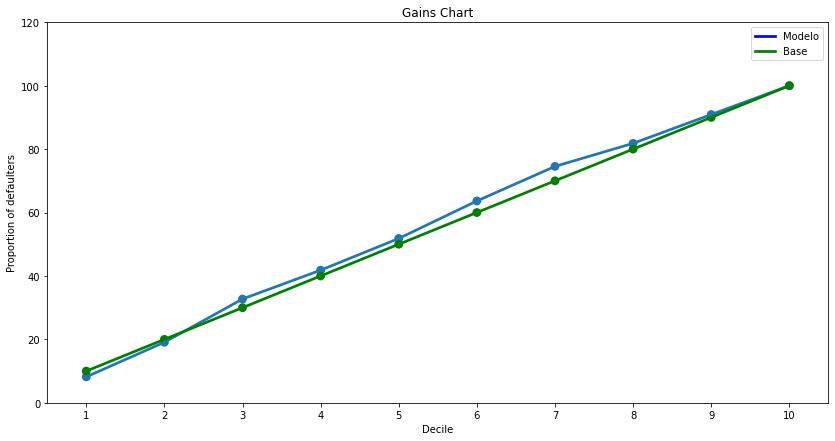

In [684]:
gain_chart=ks.copy()
gain_chart['default_cum%'] = np.round(((gain_chart['events'] / gain_chart['events'].sum()).cumsum()), 4) * 100
gain_chart2 = gain_chart[['default_cum%']]
gain_chart2.reset_index()
gain_chart2.columns = ['default_cum%_test']
gain_chart2['Base %'] = [10,20,30,40,50,60,70,80,90,100]

#gain_chart2.to_csv('Eval_model_2/gain_chart.csv',index=False)
display(gain_chart2)
fig, ax = plt.subplots(figsize=(14, 7), sharex=True)
sns.pointplot(data=gain_chart2.reset_index(), x='Decile', y='default_cum%_test')
sns.pointplot(data=gain_chart2.reset_index(), x='Decile', y='Base %',color='green')
ax.tick_params(axis='x')
ax.set(xlabel='Decile', ylabel='Proportion of defaulters')
ax.set_ylim(0,120)
ax.set_title('Gains Chart')
ax.legend(['Modelo','Base'],loc='best')
leg = ax.get_legend()
leg.legendHandles[0].set_color('blue')
leg.legendHandles[1].set_color('green')
plt.show()

,lift_test,Baseline
Decile,,
1,0.818000,1
2,0.954500,1
3,1.091000,1
4,1.045500,1
5,1.036400,1
6,1.060667,1
7,1.065000,1
8,1.022750,1
9,1.010111,1


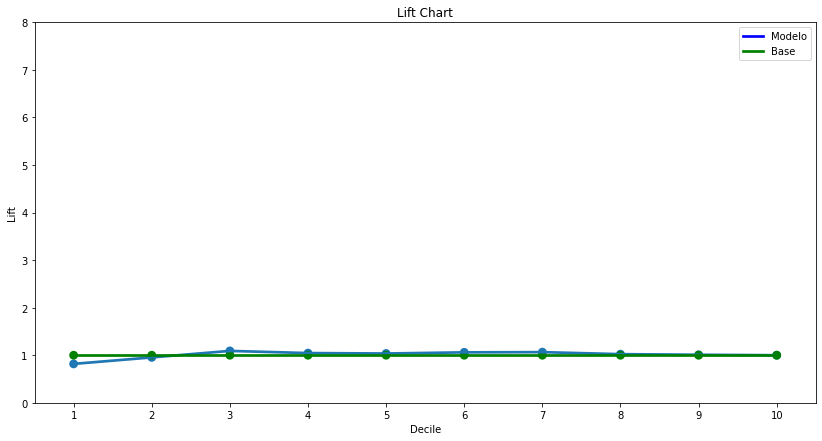

In [685]:
lift_chart=gain_chart2.copy()
lift_chart['lift_test'] = (lift_chart['default_cum%_test']/lift_chart['Base %'])
lift_chart['Baseline']  = [1,1,1,1,1,1,1,1,1,1]
lift_chart.drop(['default_cum%_test','Base %'],axis=1,inplace=True)

#lift_chart.to_csv('Eval_model_2/lift_chart.csv',index=False)

display(lift_chart)

fig, ax = plt.subplots(figsize=(14, 7), sharex=True)
sns.pointplot(data=lift_chart.reset_index(), x='Decile', y='lift_test')
sns.pointplot(data=lift_chart.reset_index(), x='Decile', y='Baseline',color='green')
ax.tick_params(axis='x')
ax.set(xlabel='Decile', ylabel='Lift')
ax.set_ylim(0,8)
ax.set_title('Lift Chart')
ax.legend(['Modelo','Base'],loc='best')
leg = ax.get_legend()
leg.legendHandles[0].set_color('blue')
leg.legendHandles[1].set_color('green')
plt.show()

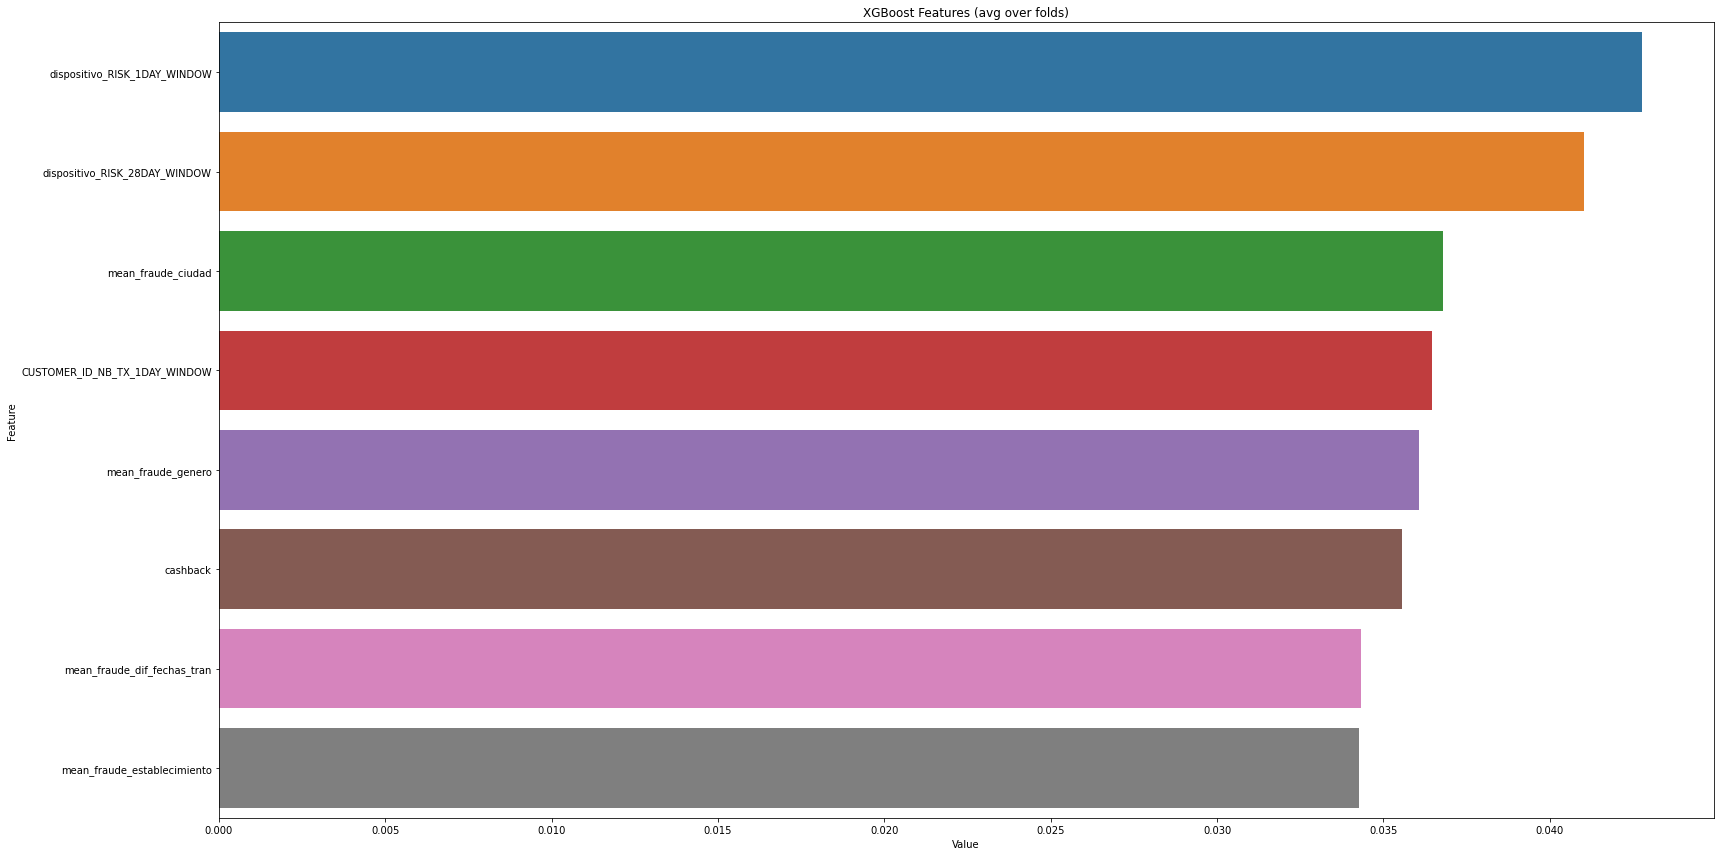

In [56]:
feature_imp = pd.DataFrame(sorted(zip(fitted_models_and_predictions_dictionary['XGBoost']['classifier'].feature_importances_,train_df_final[input_features].columns)), columns=['Value','Feature'])

#feature_imp.to_csv('Eval_model_2/feature_imp.csv',index=False)

plt.figure(figsize=(24, 12))
sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value", ascending=False).iloc[:8])
plt.title('XGBoost Features (avg over folds)')
plt.tight_layout()
plt.show()

#### Lightgbm

In [687]:
test_df_final['predictions']=fitted_models_and_predictions_dictionary['Lightgbm']['predictions_test']
test_ks=test_df_final.copy()
ks=ks_test(data=test_ks,target='fraude', prob='predictions')
# #ks.to_csv('Eval_model_2/ks_test.csv',index=False)

        min_prob  max_prob  events  nonevents event_rate nonevent_rate  \
Decile                                                                   
1       0.321575  0.481520       8      368.0      7.27%        10.08%   
2       0.285562  0.321236      12      364.0     10.91%         9.98%   
3       0.260521  0.285520       9      367.0      8.18%        10.06%   
4       0.241791  0.260505      10      366.0      9.09%        10.03%   
5       0.225863  0.241675      15      360.0     13.64%         9.87%   
6       0.210213  0.225855      15      361.0     13.64%         9.89%   
7       0.194724  0.210099      11      365.0     10.00%        10.00%   
8       0.177670  0.194695       7      369.0      6.36%        10.11%   
9       0.156830  0.177628      14      362.0     12.73%         9.92%   
10      0.081346  0.156810       9      367.0      8.18%        10.06%   

       cum_eventrate cum_noneventrate   KS  
Decile                                      
1              7.27% 

c:\users\rosorio\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,default_cum%_test,Base %
Decile,,
1,7.27,10
2,18.18,20
3,26.36,30
4,35.45,40
5,49.09,50
6,62.73,60
7,72.73,70
8,79.09,80
9,91.82,90


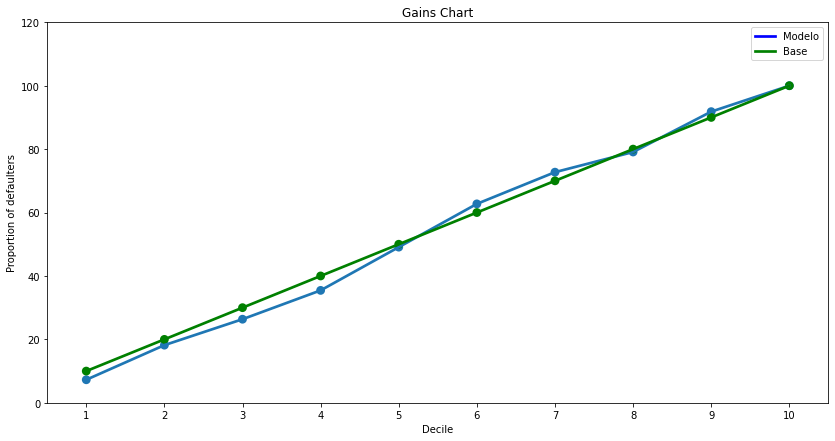

In [688]:
gain_chart=ks.copy()
gain_chart['default_cum%'] = np.round(((gain_chart['events'] / gain_chart['events'].sum()).cumsum()), 4) * 100
gain_chart2 = gain_chart[['default_cum%']]
gain_chart2.reset_index()
gain_chart2.columns = ['default_cum%_test']
gain_chart2['Base %'] = [10,20,30,40,50,60,70,80,90,100]

#gain_chart2.to_csv('Eval_model_2/gain_chart.csv',index=False)
display(gain_chart2)
fig, ax = plt.subplots(figsize=(14, 7), sharex=True)
sns.pointplot(data=gain_chart2.reset_index(), x='Decile', y='default_cum%_test')
sns.pointplot(data=gain_chart2.reset_index(), x='Decile', y='Base %',color='green')
ax.tick_params(axis='x')
ax.set(xlabel='Decile', ylabel='Proportion of defaulters')
ax.set_ylim(0,120)
ax.set_title('Gains Chart')
ax.legend(['Modelo','Base'],loc='best')
leg = ax.get_legend()
leg.legendHandles[0].set_color('blue')
leg.legendHandles[1].set_color('green')
plt.show()

,lift_test,Baseline
Decile,,
1,0.727000,1
2,0.909000,1
3,0.878667,1
4,0.886250,1
5,0.981800,1
6,1.045500,1
7,1.039000,1
8,0.988625,1
9,1.020222,1


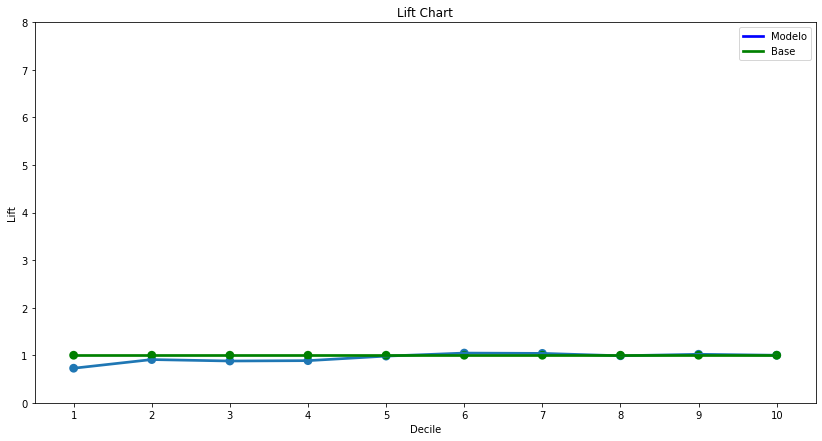

In [689]:
lift_chart=gain_chart2.copy()
lift_chart['lift_test'] = (lift_chart['default_cum%_test']/lift_chart['Base %'])
lift_chart['Baseline']  = [1,1,1,1,1,1,1,1,1,1]
lift_chart.drop(['default_cum%_test','Base %'],axis=1,inplace=True)

#lift_chart.to_csv('Eval_model_2/lift_chart.csv',index=False)

display(lift_chart)

fig, ax = plt.subplots(figsize=(14, 7), sharex=True)
sns.pointplot(data=lift_chart.reset_index(), x='Decile', y='lift_test')
sns.pointplot(data=lift_chart.reset_index(), x='Decile', y='Baseline',color='green')
ax.tick_params(axis='x')
ax.set(xlabel='Decile', ylabel='Lift')
ax.set_ylim(0,8)
ax.set_title('Lift Chart')
ax.legend(['Modelo','Base'],loc='best')
leg = ax.get_legend()
leg.legendHandles[0].set_color('blue')
leg.legendHandles[1].set_color('green')
plt.show()

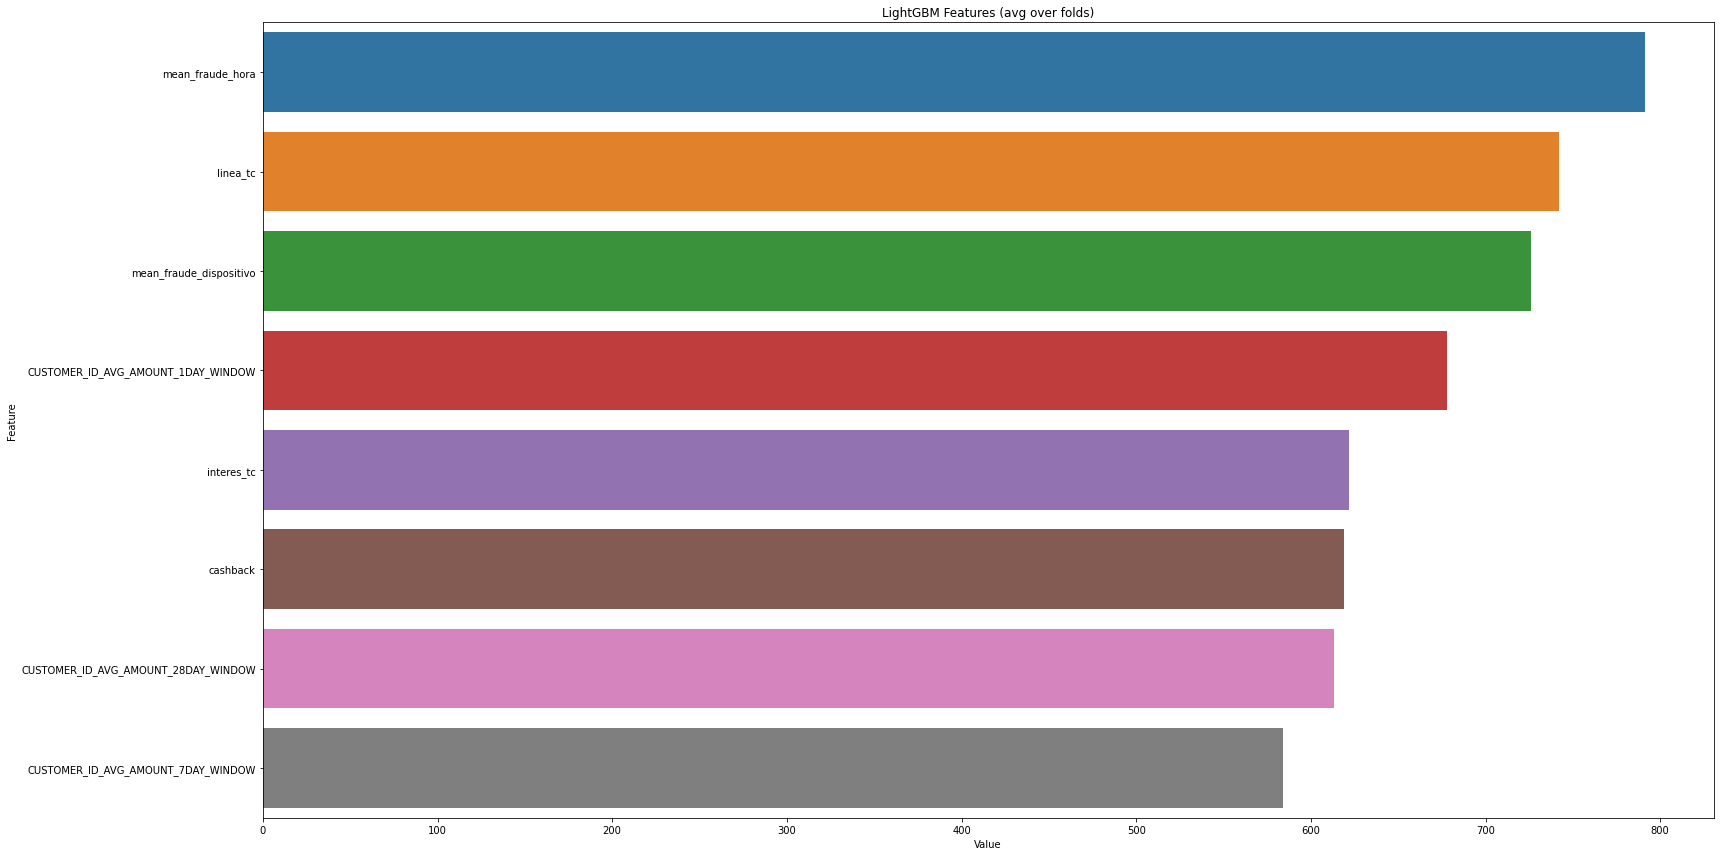

In [690]:
feature_imp = pd.DataFrame(sorted(zip(fitted_models_and_predictions_dictionary['Lightgbm']['classifier'].feature_importances_,train_df_final[input_features].columns)), columns=['Value','Feature'])

#feature_imp.to_csv('Eval_model_2/feature_imp.csv',index=False)

plt.figure(figsize=(24, 12))
sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value", ascending=False).iloc[:8])
plt.title('LightGBM Features (avg over folds)')
plt.tight_layout()
plt.show()